# Import Lib

## ⚙️ Cấu hình & tiện ích

In [11]:
import os
import re
import pickle
import joblib
import warnings
warnings.filterwarnings("ignore")

from urllib.parse import urlparse
from collections import Counter

import numpy as np
import pandas as pd
from tqdm import tqdm
import copy

## 📊 Trực quan hóa

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## 🧹 Xử lý văn bản (Text Preprocessing)

In [13]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

## 🧠 Biểu diễn văn bản (Text Embeddings)

In [14]:
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## ⚖️ Xử lý mất cân bằng dữ liệu

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks,NearMiss

## 🧮 Tiền xử lý & Chia dữ liệu

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.sparse import hstack, vstack

## 🤖 Mô hình học máy

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

## 📈 Đánh giá mô hình

In [18]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer
)


In [19]:
# Lưu dữ liệu train/test sau SMOTE
data_dir = 'D:/khai_thac_du_lieu/Final_lesson_2/processed_data'
os.makedirs(data_dir, exist_ok=True)

In [20]:
# Lưu dữ liệu train/test sau SMOTE
png_dir = 'D:/khai_thac_du_lieu/Final_lesson_2/Image'
os.makedirs(data_dir, exist_ok=True)

# Read Files

In [21]:
# gossipcop
df_go_fake = pd.read_csv('C:/Users/Admin/Downloads/gossipcop_fake.csv')
df_go_real = pd.read_csv('C:/Users/Admin/Downloads/gossipcop_real.csv')

#politifact
df_po_fake = pd.read_csv('C:/Users/Admin/Downloads/politifact_fake.csv')
df_po_real = pd.read_csv('C:/Users/Admin/Downloads/politifact_real.csv')

In [22]:
df_go_fake

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...
...,...,...,...,...
5318,gossipcop-6702260693,www.huffingtonpost.com/2012/09/11/september-11...,September 11: Celebrities Remember 9/11 (TWEETS),245643768638894080
5319,gossipcop-6051845337,www.dailymail.co.uk/news/article-4915674/NASCA...,NASCAR owners threaten to fire drivers who pro...,912048333413330944\t912048571482087424\t912049...
5320,gossipcop-2435526162,www.telegraph.co.uk/men/the-filter/7-signs-dav...,The 7 signs that David Beckham is definitely h...,897794716447539200\t897804460830928896\t897842...
5321,gossipcop-4576152851,www.vanityfair.com/style/2016/09/ryan-gosling-...,Ryan Gosling and Eva Mendes Did Not Get Marrie...,778678901572710400\t778681718714740736\t778683...


In [48]:
df_go_real

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...
...,...,...,...,...
16812,gossipcop-891749,https://omgcheckitout.com/2017-hollywood-film-...,2017 Hollywood Film Awards: The Complete List ...,927385466357260288\t927386601034010625\t927387...
16813,gossipcop-941486,https://pagesix.com/2018/06/04/jada-pinkett-sm...,Jada Pinkett Smith explains why son Jaden move...,1004044947006386178\t1004045964401889285\t1004...
16814,gossipcop-953143,https://www.etonline.com/tinsley-mortimer-reac...,Tinsley Mortimer Reacts to Luann de Lesseps' R...,1019924845889572864\t1019925702676709377\t1019...
16815,gossipcop-954366,https://www.healthbreakingnews.net/2018/07/pri...,Prince Harry Carries on Princess Diana’s Legac...,1021766291139584000\t1021772054599802880\t1021...


In [49]:
df_po_fake

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...
...,...,...,...,...
427,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...
428,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...
429,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...
430,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...


In [50]:
df_po_real

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...
...,...,...,...,...
619,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN
620,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...
621,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN
622,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874


# EDA

## Những thông tin cơ bản

In [16]:
list_news = [df_go_fake, df_go_real, df_po_fake, df_po_real]

### Info

In [17]:
df_go_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5323 non-null   object
 1   news_url   5067 non-null   object
 2   title      5323 non-null   object
 3   tweet_ids  5135 non-null   object
dtypes: object(4)
memory usage: 166.5+ KB


In [18]:
df_go_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16817 entries, 0 to 16816
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16817 non-null  object
 1   news_url   16804 non-null  object
 2   title      16817 non-null  object
 3   tweet_ids  15759 non-null  object
dtypes: object(4)
memory usage: 525.7+ KB


In [19]:
df_po_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         432 non-null    object
 1   news_url   428 non-null    object
 2   title      432 non-null    object
 3   tweet_ids  392 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB


In [20]:
df_po_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         624 non-null    object
 1   news_url   567 non-null    object
 2   title      624 non-null    object
 3   tweet_ids  409 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


### Describe

In [21]:
df_go_fake.describe()

,id,news_url,title,tweet_ids
count,5323,5067,5323,5135
unique,5323,4681,4896,5047
top,gossipcop-2493749932,www.newidea.com.au/jennifer-aniston-and-brad-p...,Connecting People Through News,900336607680761857\t900407896072216576\t900412...
freq,1,8,20,6


In [22]:
df_go_real.describe()

,id,news_url,title,tweet_ids
count,16817,16804,16817,15759
unique,16817,16010,15967,15758
top,gossipcop-882573,https://www.thewrap.com/this-is-us-everything-...,- USweekly,989840869443457024\t990987021194743808
freq,1,11,12,2


In [23]:
df_po_fake.describe()

,id,news_url,title,tweet_ids
count,432,428,432,392
unique,432,428,428,392
top,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,Account Suspended,937349434668498944\t937379378006282240\t937380...
freq,1,1,3,1


In [24]:
df_po_real.describe()

,id,news_url,title,tweet_ids
count,624,567,624,409
unique,624,541,557,402
top,politifact14984,https://web.archive.org/web/20050322064340/htt...,"Outlook, Office, Skype, Bing, Breaking News, a...",3316920364\t96972843962740736\t107435614412083...
freq,1,4,13,2


### Missing value

In [25]:
for i in list_news:
    print(i.isnull().sum())
    print('\n')

id             0
news_url     256
title          0
tweet_ids    188
dtype: int64


id              0
news_url       13
title           0
tweet_ids    1058
dtype: int64


id            0
news_url      4
title         0
tweet_ids    40
dtype: int64


id             0
news_url      57
title          0
tweet_ids    215
dtype: int64




In [26]:
# tỉ lệ missing value 
for i in list_news:
    print(i.isnull().sum()/len(i)*100)
    print('\n')

id           0.000000
news_url     4.809318
title        0.000000
tweet_ids    3.531843
dtype: float64


id           0.000000
news_url     0.077303
title        0.000000
tweet_ids    6.291253
dtype: float64


id           0.000000
news_url     0.925926
title        0.000000
tweet_ids    9.259259
dtype: float64


id            0.000000
news_url      9.134615
title         0.000000
tweet_ids    34.455128
dtype: float64




### Compare between data

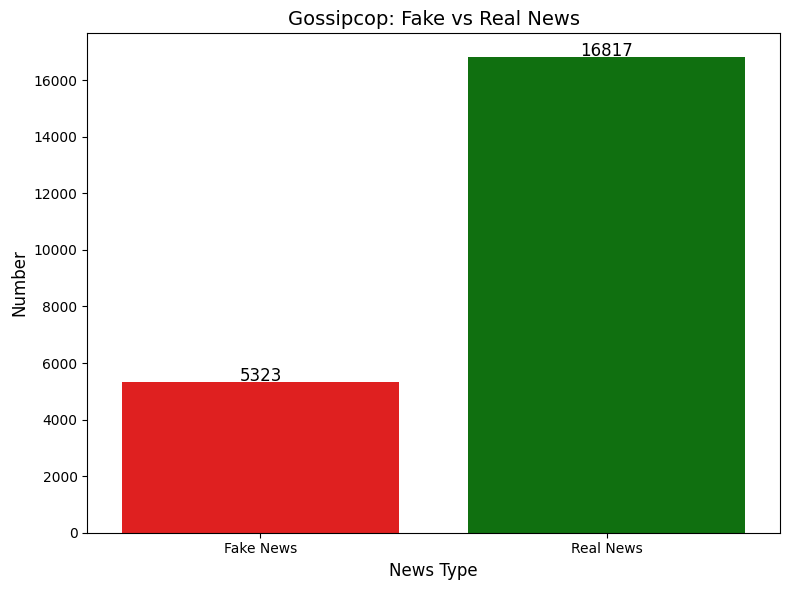

In [27]:
# số lượng giữa fake và real trong gossipcop
plt.figure(figsize=(8, 6))
counts = [len(df_go_fake), len(df_go_real)]
labels = ['Fake News', 'Real News']
sns.barplot(x=labels, y=counts, palette=['red', 'green'])
plt.title('Gossipcop: Fake vs Real News', fontsize=14)
plt.ylabel('Number', fontsize=12)
plt.xlabel('News Type', fontsize=12)
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

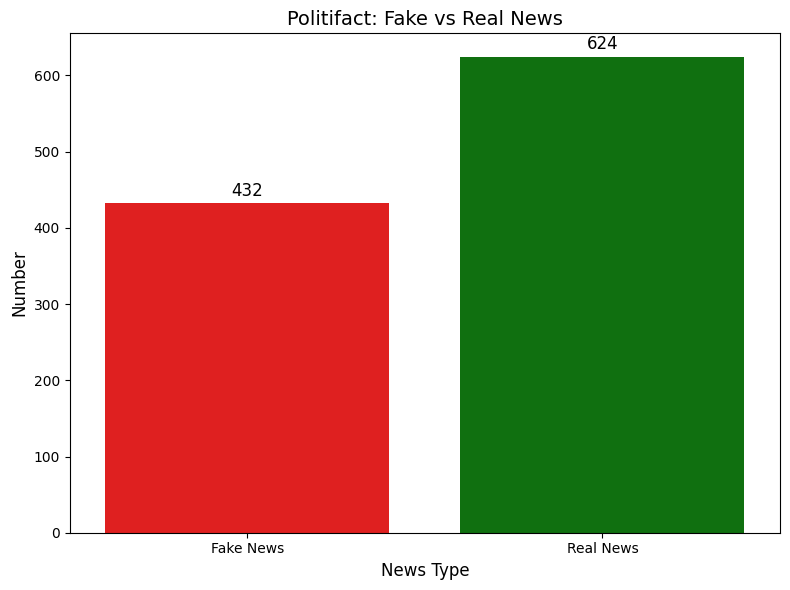

In [28]:
# số lượng giữa fake và real trong politifact
plt.figure(figsize=(8, 6))
counts = [len(df_po_fake), len(df_po_real)]
labels = ['Fake News', 'Real News']
sns.barplot(x=labels, y=counts, palette=['red', 'green'])
plt.title('Politifact: Fake vs Real News', fontsize=14)
plt.ylabel('Number', fontsize=12)
plt.xlabel('News Type', fontsize=12)
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

### Trực quan hóa kí tự

In [29]:
# Đảm bảo tải tài nguyên NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# Kết hợp dữ liệu fake và real từ cả hai nguồn (GossipCop và PolitiFact)
fake_momentary = pd.concat([df_go_fake, df_po_fake], ignore_index=True)
real_momentary = pd.concat([df_go_real, df_po_real], ignore_index=True)

In [31]:
# Hàm tạo và hiển thị WordCloud
def generate_wordcloud(text_series, title, max_words=100, background_color='white', colormap='viridis'):
    # Kết hợp tất cả tiêu đề thành một chuỗi lớn
    all_text = ' '.join(text_series.fillna('').astype(str))
    
    # Loại bỏ stop words và tạo WordCloud
    wordcloud = WordCloud(
        stopwords=STOPWORDS,  # Loại bỏ từ dừng mặc định (có thể thêm custom nếu cần)
        background_color=background_color,
        max_words=max_words,
        colormap=colormap,
        width=800,
        height=400
    ).generate(all_text)
    
    # Hiển thị
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()
    
    # Lưu hình ảnh
    wordcloud.to_file(os.path.join(png_dir, f"{title.replace(' ', '_')}.png"))

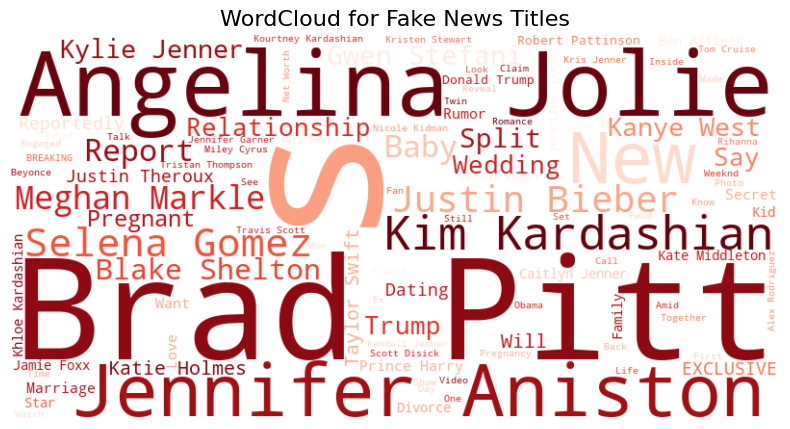

In [32]:
# Tạo WordCloud cho fake
generate_wordcloud(fake_momentary['title'], title='WordCloud for Fake News Titles', colormap='Reds')

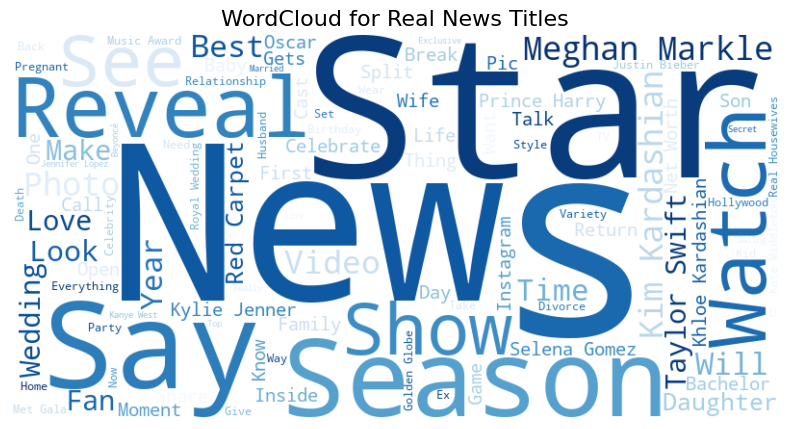

In [33]:
# Tạo WordCloud cho real
generate_wordcloud(real_momentary['title'], title='WordCloud for Real News Titles', colormap='Blues')

In [34]:
# Hàm top_words cải tiến để lấy từ phổ biến
def top_words(text_series, n=10):
    if text_series.empty or text_series.isna().all():
        print("Error: text_series is empty or all NaN")
        return []
    
    # Làm sạch và kết hợp văn bản
    all_text = ' '.join(text_series.fillna('').astype(str)).lower()
    if not all_text.strip():
        print("Error: No valid text after joining")
        return []
    
    # Tokenize bằng NLTK
    words = word_tokenize(all_text)
    if not words:
        print("Error: No words found after tokenization")
        return []
    
    # Lọc từ: không phải stop words, độ dài > 2, không phải số
    filtered_words = [word for word in words if word not in STOPWORDS and len(word) > 2 and not word.isdigit()]
    if not filtered_words:
        print("Error: No words remain after filtering")
        return []
    
    return Counter(filtered_words).most_common(n)

In [35]:
# Lấy top 10 từ cho fake và real
top_fake = top_words(fake_momentary['title'], n=10)
top_real = top_words(real_momentary['title'], n=10)

In [36]:
# Hàm vẽ biểu đồ cột ngang với gradient màu (đã xóa colorbar)
def plot_horizontal_bar_gradient(words, counts, title, colormap, filename):
    if not words or not counts:
        print(f"Error: No data to plot for {title}")
        return
    
    # Tạo figure và axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Tạo gradient màu dựa trên tần suất thực tế
    cmap = plt.get_cmap(colormap)
    norm = plt.Normalize(min(counts), max(counts))  # Ánh xạ màu dựa trên tần suất thực tế
    colors = [cmap(norm(count)) for count in counts]  # Màu dựa trên tần suất của từng từ
    
    # Vẽ biểu đồ cột ngang, từ cao nhất (trên) đến thấp nhất (dưới)
    ax.barh(words[::-1], counts[::-1], color=colors, alpha=0.8)  # Đảo ngược thứ tự để cao nhất ở trên
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')
    ax.set_title(title)
    
    # Tùy chỉnh layout (không có colorbar)
    plt.tight_layout()
    
    # Lưu biểu đồ
    plt.savefig(os.path.join(png_dir, filename))
    plt.show()

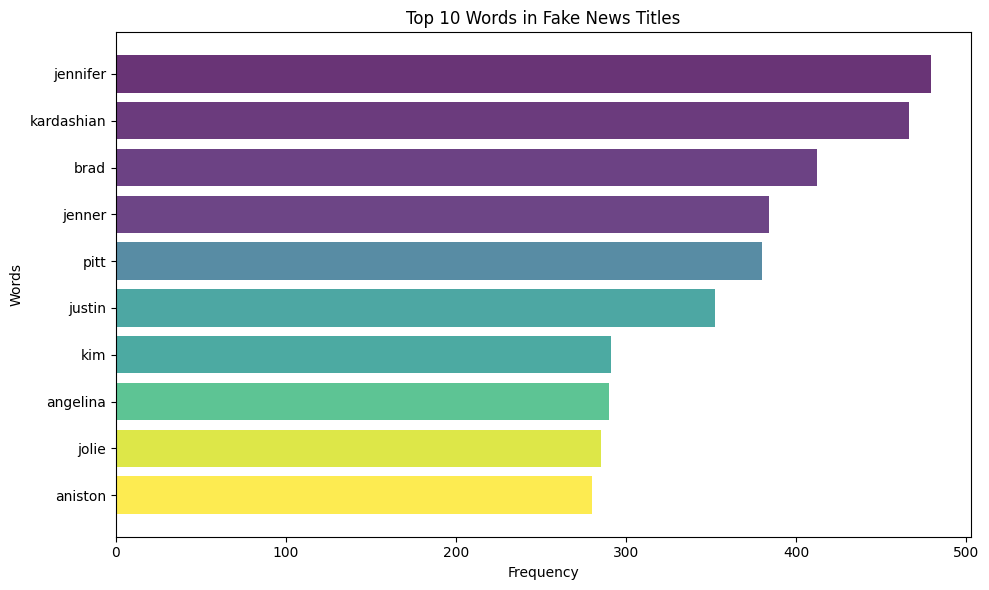

In [37]:
# Vẽ biểu đồ cho Fake News
words_fake, counts_fake = zip(*top_fake) if top_fake else ([], [])
plot_horizontal_bar_gradient(words_fake, counts_fake, 
                            title='Top 10 Words in Fake News Titles', 
                            colormap='viridis',  # Gradient từ vàng nhạt (thấp) đến xanh đậm (cao)
                            filename='top_words_fake_horizontal_gradient.png')

In [38]:
# In top words để kiểm tra
print("Top 10 words in Fake Titles:", top_fake)

Top 10 words in Fake Titles: [('jennifer', 479), ('kardashian', 466), ('brad', 412), ('jenner', 384), ('pitt', 380), ('justin', 352), ('kim', 291), ('angelina', 290), ('jolie', 285), ('aniston', 280)]


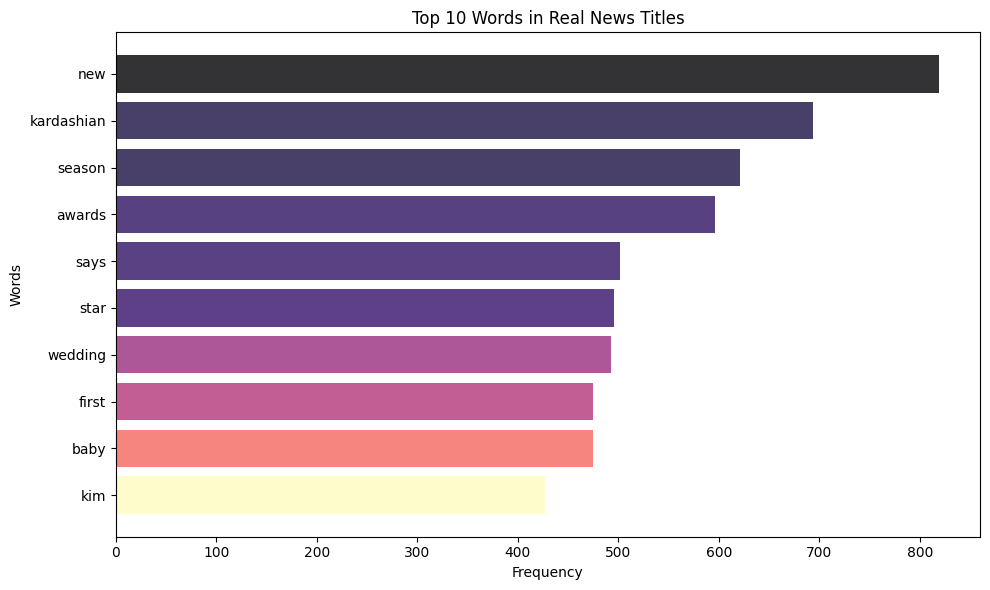

In [39]:
# Vẽ biểu đồ cho Real News
words_real, counts_real = zip(*top_real) if top_real else ([], [])
plot_horizontal_bar_gradient(words_real, counts_real, 
                            title='Top 10 Words in Real News Titles', 
                            colormap='magma',  # Gradient từ tím nhạt (thấp) đến đỏ đậm (cao)
                            filename='top_words_real_horizontal_gradient.png')

In [40]:
print("Top 10 words in Real Titles:", top_real)

Top 10 words in Real Titles: [('new', 819), ('kardashian', 694), ('season', 621), ('awards', 596), ('says', 502), ('star', 496), ('wedding', 493), ('first', 475), ('baby', 475), ('kim', 427)]


# Get infomation necessary

In [23]:
# gossipcop
nes_go_fake = df_go_fake['title']
nes_go_real = df_go_real['title']

# politifact
nes_po_fake = df_po_fake['title']
nes_po_real = df_po_real['title']

In [24]:
# merge data
df_fake = pd.concat([nes_go_fake, nes_po_fake], ignore_index=True)
df_real = pd.concat([nes_go_real, nes_po_real], ignore_index=True)

In [25]:
# add label
df_fake = pd.DataFrame({'title': df_fake, 'label': 0})
df_real = pd.DataFrame({'title': df_real, 'label': 1})

# Preprocessing

## Xử lý văn bản

In [26]:
# #Download stopwords nếu chưa có (chạy một lần)
nltk.download('stopwords')
nltk.download('punkt')  # Cho word_tokenize

# Danh sách stopwords tiếng Anh
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
def remove_extra_spaces(text):
    # Thay thế khoảng trắng thừa bằng một khoảng trắng duy nhất
    text = re.sub(r'\s+', ' ', text)
    # Xóa khoảng trắng ở đầu và cuối
    return text.strip()

In [28]:
def remove_punctuation(text):
    # Xóa dấu câu (giữ chữ cái và khoảng trắng)
    return re.sub(r'[^\w\s]', '', text)

In [29]:
def remove_numbers(text):
    # Xóa tất cả các số
    return re.sub(r'\d+', '', text)

In [30]:
def to_lowercase(text):
    # chuyển đổi tất cả ký tự thành chữ thường
    return text.lower()

In [31]:
def remove_stopwords(text):
    # xóa stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [32]:
def apply_stemming(text):  
    # Chuẩn hóa từ bằng stemming
    return ' '.join(stemmer.stem(word) for word in word_tokenize(text))

In [33]:
def normalize_text(text):  
    # Xóa dấu accent bằng ASCII
    return text.encode('ascii', 'ignore').decode('ascii')

In [34]:
def tokenize_text(text):
    """
    Tokenize văn bản thành list từ.
    - Xử lý dấu câu, khoảng trắng thông minh.
    - Input: string
    - Output: list[str]
    """
    # Tokenize trực tiếp, word_tokenize tự handle lowercase/punctuation cơ bản
    tokens = word_tokenize(text)
    return tokens

In [35]:
def preprocess_text(text, return_tokens=True):
    # Bước 1: Chuyển sang chữ thường
    text = to_lowercase(text)
    
    # Bước 2: Xóa số
    text = remove_numbers(text)
    
    # Bước 3: Xóa dấu câu
    text = remove_punctuation(text)
    
    # Bước 4: Xóa khoảng trắng thừa
    text = remove_extra_spaces(text)
    
    # Bước 5: Tokenize
    tokens = tokenize_text(text)
    
    # Bước 6: Xóa stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Bước 7: Chuẩn hóa từ bằng stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Bước 8: Chuẩn hóa văn bản
    tokens = [normalize_text(word) for word in tokens]
    
    if return_tokens:
        return tokens
    return ' '.join(tokens)  # Trả về chuỗi cho TF-IDF

In [36]:
# xử lý ngôn ngữ tự nhiên
df_fake['title'] = df_fake['title'].apply(preprocess_text)

In [37]:
df_real['title'] = df_real['title'].apply(preprocess_text)

In [38]:
df = pd.concat([df_fake, df_real], ignore_index=True)

## Chia Train/Test

In [39]:
# Đặt X, y
X = df['title']
y = df['label']

In [40]:
# Chia dữ liệu thành tập train và test trước khi xử lý, với stratify=y để giữ tỷ lệ lớp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [72]:
# # lưu data
# joblib.dump((X_train, y_train), os.path.join(data_dir, 'train_data.pkl'))
# joblib.dump((X_test, y_test), os.path.join(data_dir, 'test_data.pkl'))

['D:/khai_thac_du_lieu/Final_lesson_2/processed_data\\test_data.pkl']

## xử lý dữ liệu mất cân bằng

In [41]:
# Chuyển danh sách tokens thành chuỗi vì TfidfVectorizer cần chuỗi
X_train_processed = X_train.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
X_test_processed = X_test.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

In [42]:
# Chuyển thành TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf_tomek = tfidf.fit_transform(X_train_processed)
X_test_tfidf_tomek = tfidf.transform(X_test_processed)

In [ ]:
# Áp dụng Tomek Links để bỏ outliers
tl = TomekLinks(sampling_strategy='majority', n_jobs=-1) 
X_train_resampled_tomek, y_train_resampled_tomek = tl.fit_resample(X_train_tfidf_tomek, y_train)

In [44]:
# Kiểm tra kích thước và phân bố lớp
print(f"Kích thước X_train trước: {X_train_tfidf_tomek.shape}")

Kích thước X_train trước: (18556, 5000)


In [45]:
print(f"Kích thước X_train sau Tomek Links: {X_train_resampled_tomek.shape}")

Kích thước X_train sau Tomek Links: (18153, 5000)


In [46]:
print(f"Phân bố lớp trước: {Counter(y_train)}")

Phân bố lớp trước: Counter({1: 13952, 0: 4604})


In [47]:
print(f"Phân bố lớp sau: {Counter(y_train_resampled_tomek)}")

Phân bố lớp sau: Counter({1: 13549, 0: 4604})


In [ ]:
nm = NearMiss()
X_train_resampled_nm,y_train_resampled_nm  =nm.fit_resample(X_train_resampled_tomek,y_train_resampled_tomek)
print('Resampled dataset shape %s' % Counter(y_train_resampled_nm))

Resampled dataset shape Counter({0: 4604, 1: 4604})


## Chuẩn hóa dữ liệu

In [54]:
# # Gán lại để dùng tiếp
X_train = X_train_resampled_nm
y_train = y_train_resampled_nm

In [55]:
# Chuẩn hóa dữ liệu TF-IDF
tfidf_scaler = StandardScaler(with_mean=False)
X_train_tfidf_scaled = tfidf_scaler.fit_transform(X_train)
X_test_tfidf_scaled = tfidf_scaler.transform(X_test_tfidf_tomek)

In [56]:
print("TF-IDF shape sau Normalization - Train:", X_train_tfidf_scaled.shape)

TF-IDF shape sau Normalization - Train: (9208, 5000)


In [57]:
print("TF-IDF shape sau Normalization - Test:", X_test_tfidf_scaled.shape)

TF-IDF shape sau Normalization - Test: (4640, 5000)


In [68]:
# Huấn luyện và đánh giá
clf = LogisticRegression()

In [ ]:
clf.fit(X_train_tfidf_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [70]:
y_pred = clf.predict(X_test_tfidf_scaled)

In [71]:
print("Kết quả với TF-IDF:")
print(classification_report(y_test, y_pred))

Kết quả với TF-IDF:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69      1151
           1       0.69      0.66      0.67      1151

    accuracy                           0.68      2302
   macro avg       0.68      0.68      0.68      2302
weighted avg       0.68      0.68      0.68      2302



### Word2Vec

In [ ]:
# 2. Word2Vec Vectorization và Normalization
# Train Word2Vec trên tập train resampled
w2v_model = Word2Vec(X_train_tfidf_scaled, vector_size=100, window=5, min_count=1, workers=4)

In [73]:
def get_title_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

In [ ]:
# Vector hóa tập train và test
X_train_w2v = np.array([get_title_vector(tokens, w2v_model) for tokens in X_train_resampled_nm])
X_test_w2v = np.array([get_title_vector(tokens, w2v_model) for tokens in X_test])


In [75]:
# Chuẩn hóa dữ liệu Word2Vec
w2v_scaler = StandardScaler()
X_train_w2v_scaled = w2v_scaler.fit_transform(X_train_w2v)
X_test_w2v_scaled = w2v_scaler.transform(X_test_w2v)

In [76]:
# Lưu Word2Vec model và scaler
w2v_model.save(os.path.join(data_dir, 'word2vec_model.model'))
joblib.dump(w2v_scaler, os.path.join(data_dir, 'w2v_scaler.pkl'))
joblib.dump(X_train_w2v_scaled, os.path.join(data_dir, 'X_train_w2v_scaled.pkl'))
joblib.dump(X_test_w2v_scaled, os.path.join(data_dir, 'X_test_w2v_scaled.pkl'))


['D:/khai_thac_du_lieu/Final_lesson_2/processed_data\\X_test_w2v_scaled.pkl']

In [77]:
print("Word2Vec shape sau Normalization - Train:", X_train_w2v_scaled.shape)

Word2Vec shape sau Normalization - Train: (9208, 100)


In [78]:
print("Word2Vec shape sau Normalization - Test:", X_test_w2v_scaled.shape)

Word2Vec shape sau Normalization - Test: (2302, 100)


In [79]:
# Huấn luyện và đánh giá
clf = LogisticRegression()

In [ ]:
clf.fit(X_train_w2v_scaled, y_train_resampled_nm)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [81]:
y_pred = clf.predict(X_test_w2v_scaled)

In [82]:
print("Kết quả với Word2Vec:")
print(classification_report(y_test, y_pred))

Kết quả với Word2Vec:
              precision    recall  f1-score   support

           0       0.74      0.64      0.68      1151
           1       0.68      0.77      0.72      1151

    accuracy                           0.71      2302
   macro avg       0.71      0.71      0.70      2302
weighted avg       0.71      0.71      0.70      2302



### BERT

In [83]:
# 3. BERT Vectorization và Normalization
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

In [84]:
def get_bert_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

In [ ]:
# Vector hóa tập train và test
X_train_bert = np.array([get_bert_embedding(' '.join(tokens)) for tokens in X_train_resampled_nm])
X_test_bert = np.array([get_bert_embedding(' '.join(tokens)) for tokens in X_test])

In [86]:
# Lưu BERT
joblib.dump(X_train_bert, os.path.join(data_dir, 'X_train_bert.pkl'))
joblib.dump(X_test_bert, os.path.join(data_dir, 'X_test_bert.pkl'))

['D:/khai_thac_du_lieu/Final_lesson_2/processed_data\\X_test_bert.pkl']

In [87]:
print("BERT shape sau Normalization - Train:", X_train_bert.shape)

BERT shape sau Normalization - Train: (9208, 768)


In [88]:
print("BERT shape sau Normalization - Test:", X_test_bert.shape)

BERT shape sau Normalization - Test: (2302, 768)


In [ ]:
# Huấn luyện và đánh giá
clf = LogisticRegression()
clf.fit(X_train_bert, y_train_resampled_nm)
y_pred = clf.predict(X_test_bert)
print("Kết quả với BERT:")
print(classification_report(y_test, y_pred))

Kết quả với BERT:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1151
           1       0.71      0.70      0.70      1151

    accuracy                           0.71      2302
   macro avg       0.71      0.71      0.71      2302
weighted avg       0.71      0.71      0.71      2302



# Model

##  Prepare

In [90]:
# Hàm vẽ biểu đồ so sánh và lưu, với số liệu trên đầu cột
def visualize_compare(scores, model_name):
    features = ['BERT']
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    df_scores = pd.DataFrame(scores, index=features, columns=metrics)
    
    # Vẽ biểu đồ cột
    ax = df_scores.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title(f"So sánh hiệu suất cho {model_name}")
    plt.ylabel('Score')
    plt.ylim(0, 1.1)  # Tăng ylim để có chỗ cho số liệu trên cột
    plt.xticks(rotation=0)
    plt.legend(loc='lower right')
    plt.tight_layout()
    
    # Thêm số liệu lên trên đầu các cột
    for i, metric in enumerate(metrics):
        for j, feature in enumerate(features):
            value = df_scores.iloc[j, i]
            if value > 0:  # Chỉ hiển thị nếu giá trị > 0 (tránh placeholder)
                ax.text(j + i * 0.2 - 0.3, value + 0.02, f'{value:.3f}', 
                        ha='center', va='bottom', fontsize=8)
    
    # Lưu biểu đồ
    plt.savefig(os.path.join(png_dir, f'{model_name}_comparison.png'))
    plt.show()

In [91]:
class BERT_LSTM(nn.Module):
    def __init__(self, input_dim=768, hidden_dim=128, num_layers=2, dropout=0.3):
        super(BERT_LSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, 2)  # 2 classes: Fake / Real

    def forward(self, x):
        # x: (batch, 1, 768)
        lstm_out, (h_n, _) = self.lstm(x)
        # Lấy hidden cuối từ 2 chiều
        hidden = torch.cat((h_n[-2], h_n[-1]), dim=1)
        hidden = self.dropout(hidden)
        out = self.fc(hidden)
        return out

In [92]:
def train_bert_lstm(
    X_train, X_test, y_train, y_test,
    input_dim=768, epochs=20, batch_size=32, lr=0.001,
    device='cuda' if torch.cuda.is_available() else 'cpu'
):
    # Chuyển dữ liệu
    X_train_tensor = torch.FloatTensor(X_train).unsqueeze(1).to(device)  # (N, 1, 768)
    X_test_tensor = torch.FloatTensor(X_test).unsqueeze(1).to(device)
    y_train_tensor = torch.LongTensor(y_train.values).to(device)
    y_test_tensor = torch.LongTensor(y_test.values).to(device)

    # DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Model
    model = BERT_LSTM(input_dim=input_dim).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Train
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

    # Evaluate
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
        y_true = y_test.values

    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1': report['weighted avg']['f1-score'],
        'y_pred': y_pred,
        'model': model  # trả về để lưu nếu cần
    }

In [93]:
def train_bert_lstm_simple(
    X_train_bert, y_train_resampled, X_test_bert, y_test,
    validation_split=0.2, epochs=15, batch_size=32, lr=0.001,
    random_state=42, device='cuda' if torch.cuda.is_available() else 'cpu'
):
    
    # 1. Chia dữ liệu thành train và validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_bert, y_train_resampled, test_size=validation_split, 
        random_state=random_state, stratify=y_train_resampled
    )

    # 2. Chuyển dữ liệu sang tensor
    X_train_tensor = torch.FloatTensor(X_train_bert).unsqueeze(1).to(device)  # (N, 1, 768)
    X_val_tensor = torch.FloatTensor(X_val).unsqueeze(1).to(device)
    X_test_tensor = torch.FloatTensor(X_test_bert).unsqueeze(1).to(device)
    
    # Xử lý pandas Series cho nhãn
    y_train_np = y_train_resampled.values if isinstance(y_train_resampled, pd.Series) else y_train_resampled
    y_val_np = y_val.values if isinstance(y_val, pd.Series) else y_val
    y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test
    
    y_train_tensor = torch.LongTensor(y_train_np).to(device)
    y_val_tensor = torch.LongTensor(y_val_np).to(device)
    y_test_tensor = torch.LongTensor(y_test_np).to(device)

    # 3. Tạo DataLoader cho tập train
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 4. Khởi tạo mô hình, loss function và optimizer
    model = BERT_LSTM(input_dim=768).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # 5. Huấn luyện mô hình
    print(f"\nTraining LSTM + BERT with Train/Validation Split")
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Đánh giá trên tập validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_pred = torch.argmax(val_outputs, dim=1).cpu().numpy()
            val_true = y_val_tensor.cpu().numpy()
            val_acc = accuracy_score(val_true, val_pred)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Val Accuracy: {val_acc:.4f}")
        model.train()  # Chuyển về chế độ huấn luyện

    # 6. Đánh giá trên tập test
    print("\nEvaluating on test set...")
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        y_pred = torch.argmax(test_outputs, dim=1).cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()

    # Tính các chỉ số
    report = classification_report(y_true, y_pred, output_dict=True)

    # In kết quả
    print(f"Test Accuracy: {report['accuracy']:.4f}")
    print(f"Test Precision: {report['weighted avg']['precision']:.4f}")
    print(f"Test Recall: {report['weighted avg']['recall']:.4f}")
    print(f"Test F1-Score: {report['weighted avg']['f1-score']:.4f}")

    # 7. Trả về kết quả
    return {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1': report['weighted avg']['f1-score'],
        'y_pred': y_pred,
        'model': model
    }

In [94]:
def plot_confusion_matrix(y_true, y_pred, model_name, normalization_type, labels=None, cmap='Blues', save_dir='Image'):
    if labels is None:
        labels = ['Fake', 'Real']  # Giả sử phân loại nhị phân tin giả/thật

    # Tính confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Tạo figure với kích thước phù hợp
    plt.figure(figsize=(8, 6))
    
    # Vẽ heatmap sử dụng seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
    
    # Thiết lập tiêu đề và nhãn
    plt.title(f'Confusion Matrix for {model_name} with {normalization_type}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    # Tạo thư mục Image nếu chưa tồn tại
    os.makedirs(save_dir, exist_ok=True)
    
    # Tạo tên file dựa trên model_name và normalization_type
    file_name = f"confusion_matrix_{model_name}_{normalization_type.replace(' ', '_')}.png"
    save_path = os.path.join(save_dir, file_name)
    
    # Lưu hình ảnh
    plt.savefig(save_path)
    print(f"Confusion matrix saved to {save_path}")
    
    # Hiển thị plot
    plt.show()

In [95]:
def visualize_compare_acc(scores, title, x_label):
    models = ['Logistic Regression','Decision Tree', 'Random Forest', 'XGBoost', 'LSTM']
    df_scores = pd.DataFrame(scores, index=models, columns=[x_label])
    
    # Vẽ biểu đồ cột
    ax = df_scores.plot(kind='bar', figsize=(10, 6), width=0.8, legend=False)
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.1)  # Tăng ylim để có chỗ cho số liệu
    plt.xticks(rotation=0)
    plt.tight_layout()
    
    # Thêm số liệu lên trên đầu các cột
    for i, model in enumerate(models):
        value = df_scores.iloc[i, 0]
        if value > 0:
            ax.text(i, value + 0.02, f'{value:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Lưu biểu đồ
    plt.savefig(os.path.join(png_dir, f'Acc_{x_label.replace(" ", "_")}.png'))
    plt.show()

In [96]:
def cross_val_bert_model(model_class, 
                         X_train_bert, 
                         y_train_resampled, 
                         k=5, 
                         model_params=None,
                         random_state=42,
                         model_name="Model",
                         verbose=True,
                         return_ensemble_predictor=False):
    if model_params is None:
        model_params = {}
    if 'random_state' not in model_params:
        model_params['random_state'] = random_state

    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=random_state)
    
    acc_list = []
    f1_list = []
    fold_reports = []
    models = []  # Lưu tất cả model

    print(f"\n=== {k}-FOLD CROSS VALIDATION: {model_name} + BERT ===")
    
    for fold, (train_idx, val_idx) in enumerate(tqdm(skf.split(X_train_bert, y_train_resampled), total=k, desc="Folds")):
        X_fold_train = X_train_bert[train_idx]
        X_fold_val = X_train_bert[val_idx]
        y_fold_train = y_train_resampled.iloc[train_idx]
        y_fold_val = y_train_resampled.iloc[val_idx]
        
        # Train model
        model = model_class(**model_params)
        model.fit(X_fold_train, y_fold_train)
        models.append(model)  # Lưu model
        
        # Predict
        y_pred = model.predict(X_fold_val)
        
        # Evaluate
        acc = accuracy_score(y_fold_val, y_pred)
        report = classification_report(y_fold_val, y_pred, output_dict=True)
        f1 = report['weighted avg']['f1-score']
        
        acc_list.append(acc)
        f1_list.append(f1)
        fold_reports.append(report)
        
        if verbose:
            print(f"  Fold {fold+1}/{k} | Acc: {acc:.4f} | F1: {f1:.4f}")
    
    # Tổng kết
    mean_acc = np.mean(acc_list)
    std_acc = np.std(acc_list)
    mean_f1 = np.mean(f1_list)
    
    print(f"\n=> {model_name} - Mean Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
    print(f"=> {model_name} - Mean F1-score: {mean_f1:.4f}")
    
    result = {
        'accuracy_scores': acc_list,
        'f1_scores': f1_list,
        'mean_accuracy': mean_acc,
        'std_accuracy': std_acc,
        'mean_f1': mean_f1,
        'fold_reports': fold_reports
    }
    
    # TRẢ VỀ HÀM DỰ ĐOÁN TRUNG BÌNH TỪ K MODEL
    if return_ensemble_predictor:
        print(f"Creating ensemble predictor from {k} fold models (average probability)...")
        
        def ensemble_predict(X):
            # Dự đoán xác suất từ từng model
            probs = np.array([model.predict_proba(X) for model in models])
            # Trung bình xác suất
            avg_probs = np.mean(probs, axis=0)
            # Lấy lớp có xác suất cao nhất
            return np.argmax(avg_probs, axis=1)
        
        result['ensemble_predict'] = ensemble_predict  # Hàm dự đoán
    
    return result

In [97]:
acc_BERT = []

## gọi lại 

In [98]:
# Gọi lại dữ liệu nhãn
X_train_resampled, y_train_resampled = joblib.load(os.path.join(data_dir, 'train_data.pkl'))
X_test, y_test = joblib.load(os.path.join(data_dir, 'test_data.pkl'))

# Gọi lại ma trận đặc trưng BERT đã chuẩn hóa
X_train_bert = joblib.load(os.path.join(data_dir, 'X_train_bert.pkl'))
X_test_bert = joblib.load(os.path.join(data_dir, 'X_test_bert.pkl'))

In [99]:
y_train_resampled = y_train_resampled.reset_index(drop=True)

## Logistic Regression

In [100]:
lr_result = cross_val_bert_model(
    model_class=LogisticRegression,
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    k=5,
    model_params={'C': 1.0, 'solver': 'liblinear', 'max_iter': 1000},
    model_name="Logistic Regression",
    verbose=True,
    return_ensemble_predictor=True
)


=== 5-FOLD CROSS VALIDATION: Logistic Regression + BERT ===


Folds:  20%|██        | 1/5 [00:03<00:14,  3.75s/it]

  Fold 1/5 | Acc: 0.7003 | F1: 0.7002


Folds:  40%|████      | 2/5 [00:07<00:11,  3.71s/it]

  Fold 2/5 | Acc: 0.7128 | F1: 0.7128


Folds:  60%|██████    | 3/5 [00:11<00:07,  3.69s/it]

  Fold 3/5 | Acc: 0.7085 | F1: 0.7085


Folds:  80%|████████  | 4/5 [00:14<00:03,  3.66s/it]

  Fold 4/5 | Acc: 0.7246 | F1: 0.7246


Folds: 100%|██████████| 5/5 [00:18<00:00,  3.68s/it]

  Fold 5/5 | Acc: 0.7056 | F1: 0.7056

=> Logistic Regression - Mean Accuracy: 0.7104 ± 0.0082
=> Logistic Regression - Mean F1-score: 0.7103
Creating ensemble predictor from 5 fold models (average probability)...


In [101]:
# LẤY HÀM DỰ ĐOÁN TRUNG BÌNH
predict_test = lr_result['ensemble_predict']

# DỰ ĐOÁN TRÊN TEST
y_pred_bert = predict_test(X_test_bert) 

report_bert = classification_report(y_test, y_pred_bert, output_dict=True)

# report_bert = classification_report(y_test, y_pred_bert)

In [102]:
print(report_bert)

{'0': {'precision': 0.7056313993174061, 'recall': 0.7185056472632494, 'f1-score': 0.7120103314679294, 'support': 1151.0}, '1': {'precision': 0.7132743362831858, 'recall': 0.7002606429192006, 'f1-score': 0.7067075843928101, 'support': 1151.0}, 'accuracy': 0.709383145091225, 'macro avg': {'precision': 0.709452867800296, 'recall': 0.709383145091225, 'f1-score': 0.7093589579303697, 'support': 2302.0}, 'weighted avg': {'precision': 0.709452867800296, 'recall': 0.709383145091225, 'f1-score': 0.7093589579303697, 'support': 2302.0}}


In [103]:
acc_BERT.append(report_bert['accuracy'])

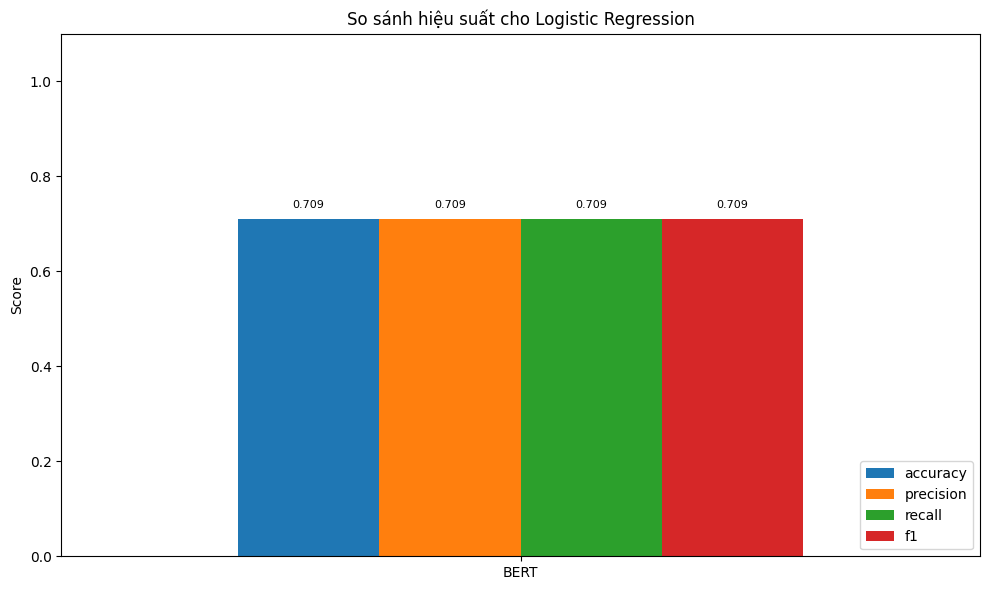

In [104]:
# Thu thập scores
scores = [
    [report_bert['accuracy'], 
     report_bert['weighted avg']['precision'], 
     report_bert['weighted avg']['recall'], 
     report_bert['weighted avg']['f1-score']]
]

# Vẽ biểu đồ và lưu
visualize_compare(scores, "Logistic Regression")

Confusion matrix saved to Image\confusion_matrix_Logistic Regression_BERT.png


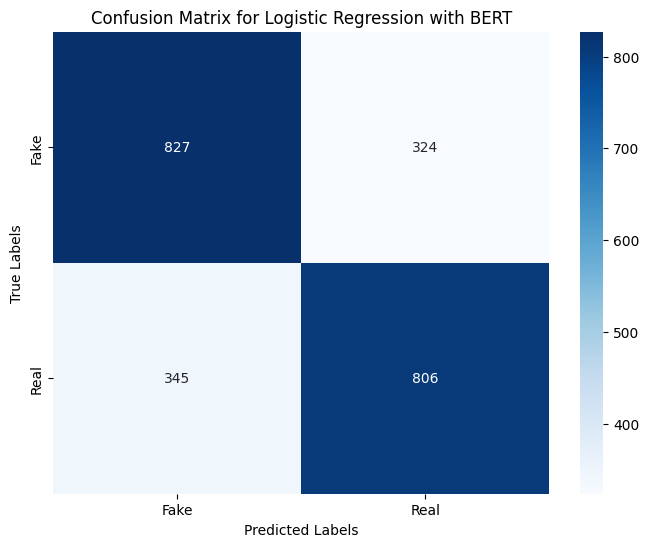

In [105]:
plot_confusion_matrix(y_test, y_pred_bert, model_name='Logistic Regression', normalization_type='BERT', labels=['Fake', 'Real'])

## Decision Tree

In [106]:
dt_model = cross_val_bert_model(
    model_class=DecisionTreeClassifier,
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    k=5,
    model_params={'max_depth': 20, 'random_state': 42},
    model_name="Decision Tree",
    verbose=True,
    return_ensemble_predictor=True
)


=== 5-FOLD CROSS VALIDATION: Decision Tree + BERT ===


Folds:  20%|██        | 1/5 [00:11<00:45, 11.28s/it]

  Fold 1/5 | Acc: 0.5879 | F1: 0.5872


Folds:  40%|████      | 2/5 [00:22<00:33, 11.01s/it]

  Fold 2/5 | Acc: 0.6053 | F1: 0.6052


Folds:  60%|██████    | 3/5 [00:34<00:23, 11.74s/it]

  Fold 3/5 | Acc: 0.5869 | F1: 0.5866


Folds:  80%|████████  | 4/5 [00:49<00:12, 12.82s/it]

  Fold 4/5 | Acc: 0.5953 | F1: 0.5952


Folds: 100%|██████████| 5/5 [01:00<00:00, 12.01s/it]

  Fold 5/5 | Acc: 0.6008 | F1: 0.6003

=> Decision Tree - Mean Accuracy: 0.5952 ± 0.0071
=> Decision Tree - Mean F1-score: 0.5949
Creating ensemble predictor from 5 fold models (average probability)...


In [107]:
# LẤY HÀM DỰ ĐOÁN TRUNG BÌNH
predict_test = dt_model['ensemble_predict']

# DỰ ĐOÁN TRÊN TEST
y_pred_bert = predict_test(X_test_bert) 

report_bert = classification_report(y_test, y_pred_bert,output_dict=True)

# report_bert = classification_report(y_test, y_pred_bert)

In [108]:
print(report_bert)

{'0': {'precision': 0.6257408975444538, 'recall': 0.6420503909643788, 'f1-score': 0.6337907375643225, 'support': 1151.0}, '1': {'precision': 0.632471008028546, 'recall': 0.6159860990443093, 'f1-score': 0.6241197183098591, 'support': 1151.0}, 'accuracy': 0.629018245004344, 'macro avg': {'precision': 0.6291059527865, 'recall': 0.629018245004344, 'f1-score': 0.6289552279370908, 'support': 2302.0}, 'weighted avg': {'precision': 0.6291059527865, 'recall': 0.629018245004344, 'f1-score': 0.6289552279370908, 'support': 2302.0}}


In [109]:
acc_BERT.append(report_bert['accuracy'])

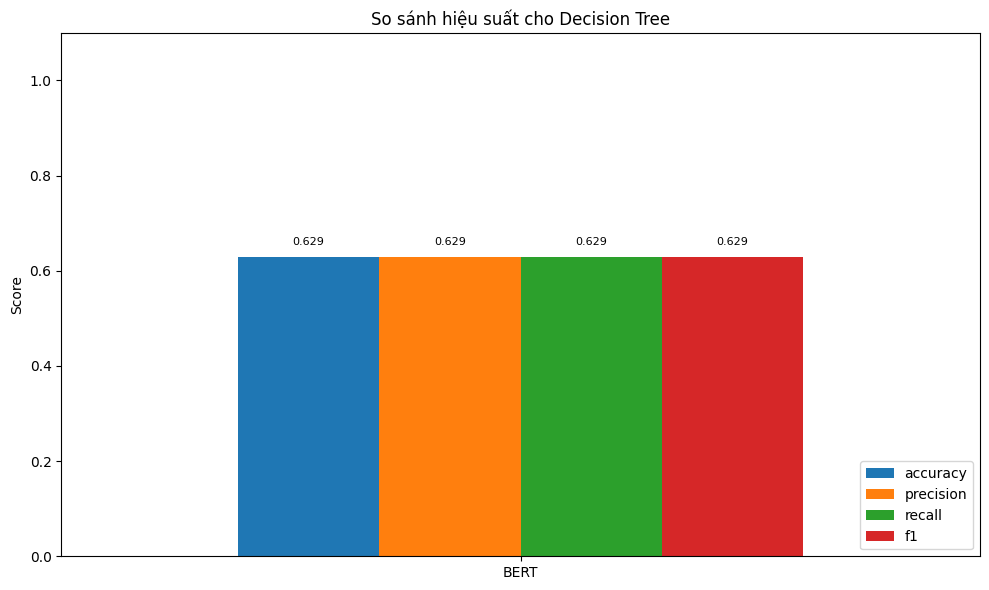

In [110]:
# Thu thập scores
scores_dt = [
    [report_bert['accuracy'],
     report_bert['weighted avg']['precision'],
     report_bert['weighted avg']['recall'],
     report_bert['weighted avg']['f1-score']]
]
# Vẽ biểu đồ so sánh
visualize_compare(scores_dt, "Decision Tree")

Confusion matrix saved to Image\confusion_matrix_Decision Tree_BERT.png


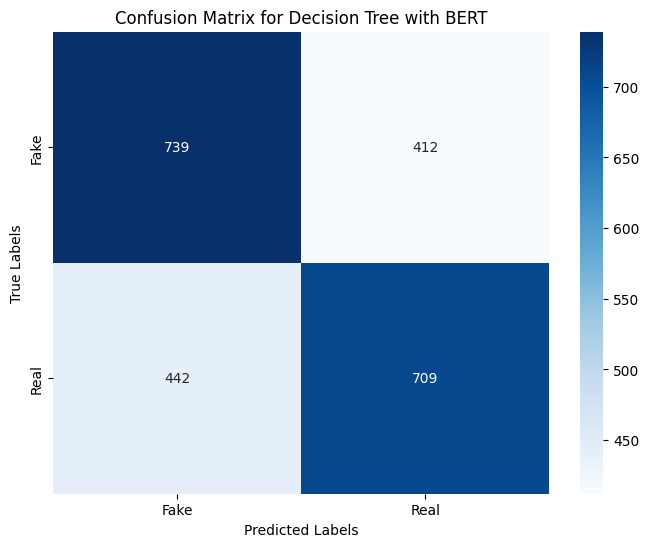

In [111]:
# Vẽ confusion matrix
plot_confusion_matrix(
    y_test, y_pred_bert,
    model_name='Decision Tree',
    normalization_type='BERT',
    labels=['Fake', 'Real']
)

## Random Forest

In [112]:
# CHẠY 5-FOLD CV CHO RANDOM FOREST
rf_model = cross_val_bert_model(
    model_class=RandomForestClassifier,
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    k=5,
    model_params={
        'n_estimators': 100,     # Số cây (quan trọng nhất)
        'max_depth': 20,         # Giới hạn độ sâu
        'random_state': 42,      # Reproducible
        'n_jobs': -1             # Dùng hết CPU
    },
    model_name="Random Forest",
    verbose=True,
    return_ensemble_predictor=True
)


=== 5-FOLD CROSS VALIDATION: Random Forest + BERT ===


Folds:  20%|██        | 1/5 [00:05<00:21,  5.46s/it]

  Fold 1/5 | Acc: 0.6824 | F1: 0.6811


Folds:  40%|████      | 2/5 [00:10<00:16,  5.34s/it]

  Fold 2/5 | Acc: 0.7030 | F1: 0.7025


Folds:  60%|██████    | 3/5 [00:15<00:10,  5.26s/it]

  Fold 3/5 | Acc: 0.6732 | F1: 0.6729


Folds:  80%|████████  | 4/5 [00:20<00:05,  5.15s/it]

  Fold 4/5 | Acc: 0.7012 | F1: 0.7006


Folds: 100%|██████████| 5/5 [00:26<00:00,  5.29s/it]

  Fold 5/5 | Acc: 0.6931 | F1: 0.6922

=> Random Forest - Mean Accuracy: 0.6906 ± 0.0114
=> Random Forest - Mean F1-score: 0.6899
Creating ensemble predictor from 5 fold models (average probability)...


In [113]:
# LẤY HÀM DỰ ĐOÁN TRUNG BÌNH
predict_test = rf_model['ensemble_predict']

# DỰ ĐOÁN TRÊN TEST
y_pred_bert = predict_test(X_test_bert) 

report_bert = classification_report(y_test, y_pred_bert,output_dict=True)


# report_bert = classification_report(y_test, y_pred_bert)

In [114]:
acc_BERT.append(report_bert['accuracy'])

In [115]:
print(report_bert)

{'0': {'precision': 0.7157894736842105, 'recall': 0.6498696785403997, 'f1-score': 0.6812386156648452, 'support': 1151.0}, '1': {'precision': 0.6793953858392999, 'recall': 0.7419635099913119, 'f1-score': 0.7093023255813954, 'support': 1151.0}, 'accuracy': 0.6959165942658557, 'macro avg': {'precision': 0.6975924297617553, 'recall': 0.6959165942658558, 'f1-score': 0.6952704706231203, 'support': 2302.0}, 'weighted avg': {'precision': 0.6975924297617553, 'recall': 0.6959165942658557, 'f1-score': 0.6952704706231203, 'support': 2302.0}}


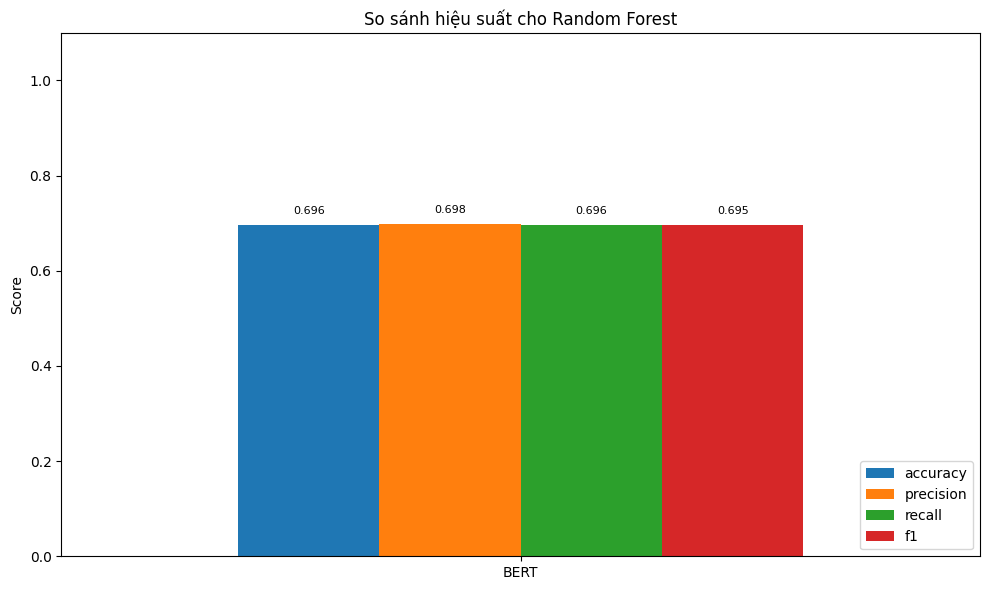

In [116]:
# Thu thập scores
scores = [
    [report_bert['accuracy'], 
     report_bert['weighted avg']['precision'], 
     report_bert['weighted avg']['recall'], 
     report_bert['weighted avg']['f1-score']]
]

# Vẽ biểu đồ và lưu
visualize_compare(scores, "Random Forest")

Confusion matrix saved to Image\confusion_matrix_Random Forest_BERT.png


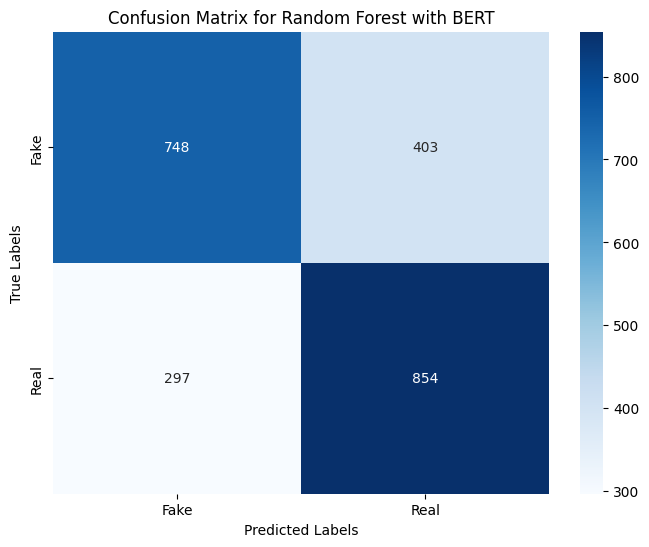

In [117]:
plot_confusion_matrix(y_test, y_pred_bert, model_name='Random Forest', normalization_type='BERT', labels=['Fake', 'Real'])

## XGBoost

In [118]:
# CHẠY 5-FOLD CV CHO XGBOOST
xgb_model = cross_val_bert_model(
    model_class=XGBClassifier,
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    k=5,
    model_params={
        'n_estimators': 100,           # Số cây
        'max_depth': 6,          
        'learning_rate': 0.1,          # Tốc độ học
        'subsample': 0.8,              # Tỷ lệ mẫu
        'colsample_bytree': 0.8,       # Tỷ lệ cột
        'random_state': 42,
        'use_label_encoder': False,    # Tránh warning
        'eval_metric': 'logloss',      # Cho binary classification
        'n_jobs': -1
    },
    model_name="XGBoost", 
    verbose=True,
    return_ensemble_predictor=True  
)


=== 5-FOLD CROSS VALIDATION: XGBoost + BERT ===


Folds:  20%|██        | 1/5 [00:22<01:28, 22.02s/it]

  Fold 1/5 | Acc: 0.6949 | F1: 0.6947


Folds:  40%|████      | 2/5 [00:43<01:05, 21.93s/it]

  Fold 2/5 | Acc: 0.7036 | F1: 0.7035


Folds:  60%|██████    | 3/5 [01:05<00:43, 21.83s/it]

  Fold 3/5 | Acc: 0.7036 | F1: 0.7036


Folds:  80%|████████  | 4/5 [01:26<00:21, 21.51s/it]

  Fold 4/5 | Acc: 0.7056 | F1: 0.7055


Folds: 100%|██████████| 5/5 [01:48<00:00, 21.62s/it]

  Fold 5/5 | Acc: 0.7121 | F1: 0.7121

=> XGBoost - Mean Accuracy: 0.7040 ± 0.0055
=> XGBoost - Mean F1-score: 0.7039
Creating ensemble predictor from 5 fold models (average probability)...


In [119]:
# LẤY HÀM DỰ ĐOÁN TRUNG BÌNH
predict_test = xgb_model['ensemble_predict']

# DỰ ĐOÁN TRÊN TEST
y_pred_bert = predict_test(X_test_bert) 

report_bert = classification_report(y_test, y_pred_bert,output_dict=True)

# report_bert = classification_report(y_test, y_pred_bert)

In [120]:
print(report_bert)

{'0': {'precision': 0.7133872416891285, 'recall': 0.6898349261511729, 'f1-score': 0.7014134275618374, 'support': 1151.0}, '1': {'precision': 0.6997476871320437, 'recall': 0.7228496959165943, 'f1-score': 0.7111111111111111, 'support': 1151.0}, 'accuracy': 0.7063423110338836, 'macro avg': {'precision': 0.7065674644105862, 'recall': 0.7063423110338836, 'f1-score': 0.7062622693364743, 'support': 2302.0}, 'weighted avg': {'precision': 0.706567464410586, 'recall': 0.7063423110338836, 'f1-score': 0.7062622693364743, 'support': 2302.0}}


In [121]:
acc_BERT.append(report_bert['accuracy'])

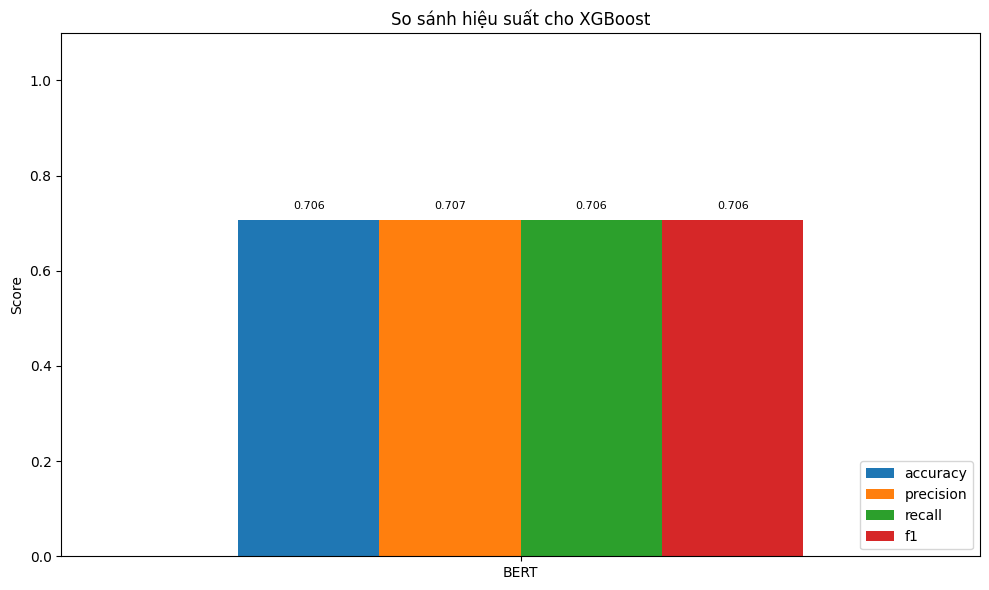

In [122]:
# Thu thập scores
scores = [
    [report_bert['accuracy'], 
     report_bert['weighted avg']['precision'], 
     report_bert['weighted avg']['recall'], 
     report_bert['weighted avg']['f1-score']]
]

# Vẽ biểu đồ và lưu
visualize_compare(scores, "XGBoost")

Confusion matrix saved to Image\confusion_matrix_XGBoost_BERT.png


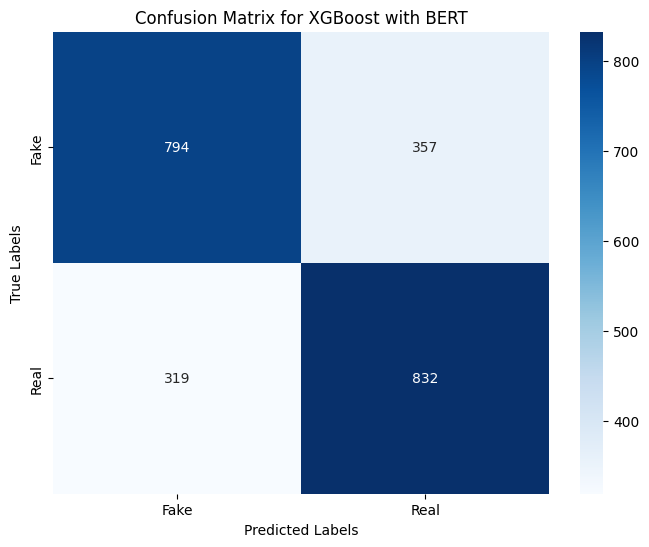

In [123]:
plot_confusion_matrix(y_test, y_pred_bert, model_name='XGBoost', normalization_type='BERT', labels=['Fake', 'Real'])

## LSTM

In [124]:
# HUẤN LUYỆN LSTM
lstm_result = train_bert_lstm_simple(
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    X_test_bert=X_test_bert,
    y_test=y_test,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    lr=0.001,
    random_state=42)


Training LSTM + BERT with Train/Validation Split
Epoch 1/20, Loss: 0.6122, Val Accuracy: 0.7020
Epoch 2/20, Loss: 0.5636, Val Accuracy: 0.7248
Epoch 3/20, Loss: 0.5432, Val Accuracy: 0.7443
Epoch 4/20, Loss: 0.5192, Val Accuracy: 0.7546
Epoch 5/20, Loss: 0.4960, Val Accuracy: 0.7888
Epoch 6/20, Loss: 0.4660, Val Accuracy: 0.8198
Epoch 7/20, Loss: 0.4355, Val Accuracy: 0.8436
Epoch 8/20, Loss: 0.4018, Val Accuracy: 0.8621
Epoch 9/20, Loss: 0.3672, Val Accuracy: 0.8746
Epoch 10/20, Loss: 0.3238, Val Accuracy: 0.8952
Epoch 11/20, Loss: 0.3005, Val Accuracy: 0.9218
Epoch 12/20, Loss: 0.2663, Val Accuracy: 0.9397
Epoch 13/20, Loss: 0.2396, Val Accuracy: 0.9468
Epoch 14/20, Loss: 0.2026, Val Accuracy: 0.9511
Epoch 15/20, Loss: 0.1868, Val Accuracy: 0.9625
Epoch 16/20, Loss: 0.1708, Val Accuracy: 0.9501
Epoch 17/20, Loss: 0.1546, Val Accuracy: 0.9718
Epoch 18/20, Loss: 0.1368, Val Accuracy: 0.9691
Epoch 19/20, Loss: 0.1277, Val Accuracy: 0.9767
Epoch 20/20, Loss: 0.1226, Val Accuracy: 0.9843

In [125]:
scores = {
    'accuracy': [lstm_result['accuracy']],
    'precision': [lstm_result['precision']],
    'recall': [lstm_result['recall']],
    'f1': [lstm_result['f1']]
}
scores_df = pd.DataFrame(scores, index=['BERT'])

In [126]:
acc_BERT.append(lstm_result['accuracy'])

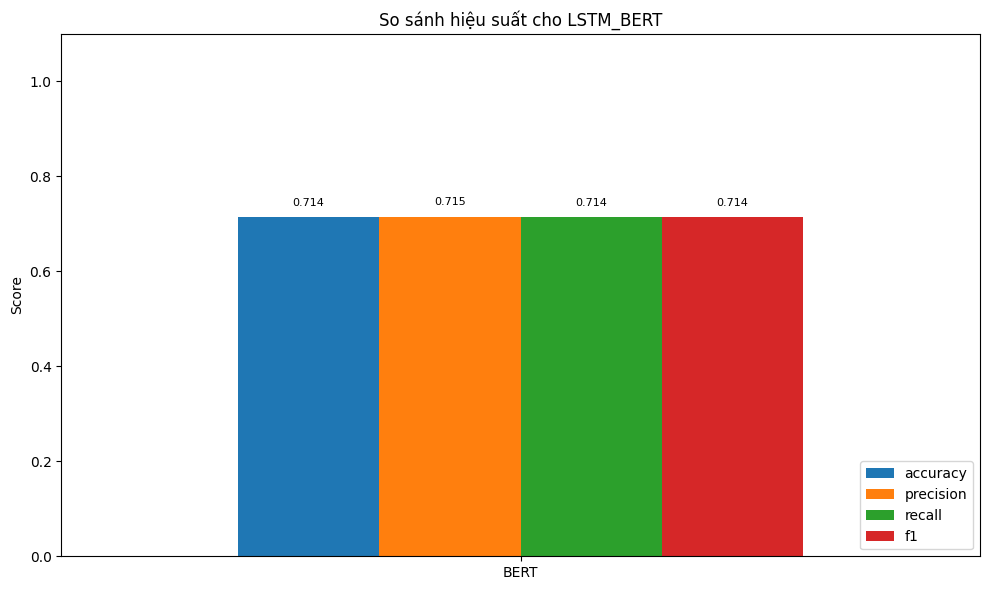

In [127]:
# Vẽ biểu đồ và lưu
visualize_compare(scores_df, "LSTM_BERT")

Confusion matrix saved to D:/khai_thac_du_lieu/Final_lesson_2/Image\confusion_matrix_LSTM_BERT_No_Normalization.png


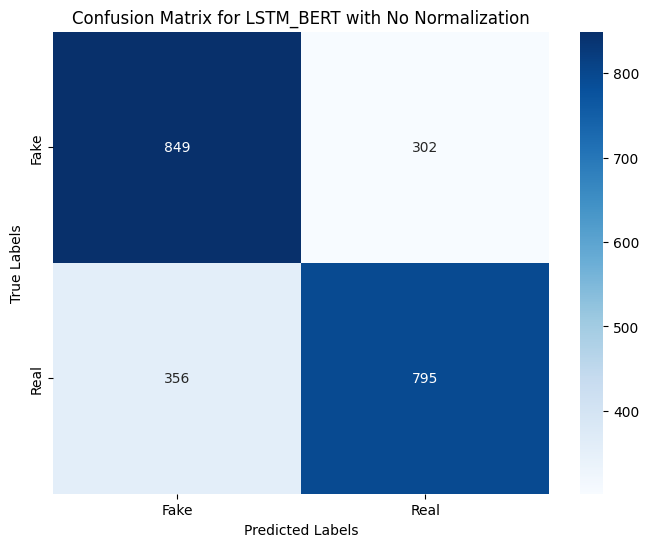

In [128]:
y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test
plot_confusion_matrix(
    y_true=y_test_np,
    y_pred=lstm_result['y_pred'],
    model_name='LSTM_BERT',
    normalization_type='No Normalization',
    labels=['Fake', 'Real'],
    save_dir=png_dir
)

## So sánh accuracy giữa các mô hình 

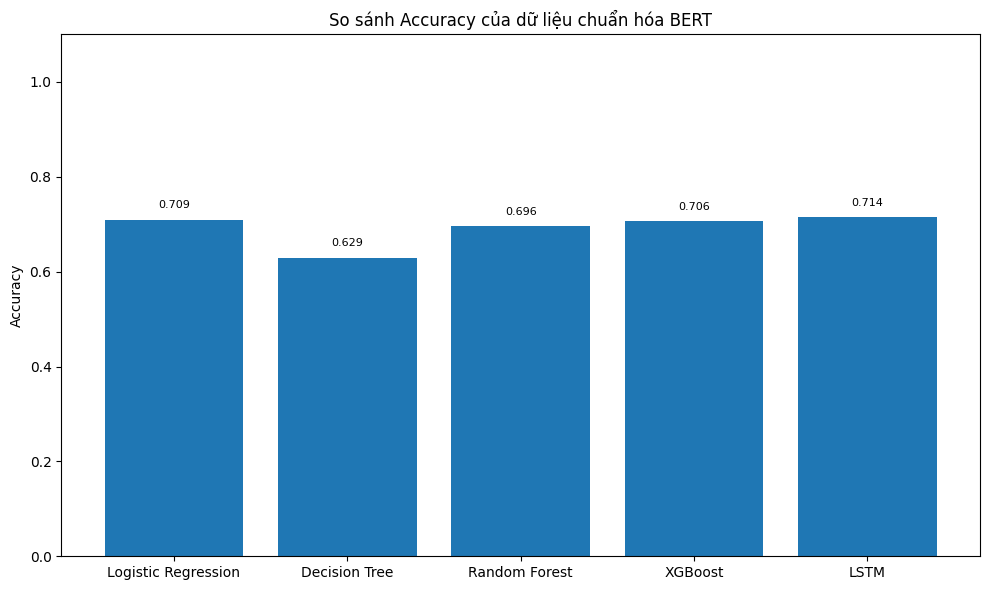

In [129]:
visualize_compare_acc(acc_BERT, 'So sánh Accuracy của dữ liệu chuẩn hóa BERT', 'BERT')

# Fine Tunning

In [21]:
best_model_dir = 'D:/khai_thac_du_lieu/Final_lesson_2/best_model'
os.makedirs(best_model_dir, exist_ok=True)  # Tạo folder best_model nếu chưa có

In [ ]:
def tune_and_save_lstm(
    X_train_bert,
    y_train_resampled,
    X_test_bert=None,
    y_test=None,
    lstm_grid=None,
    input_dim=768,
    save_dir="best_models",
    model_name="LSTM",
    val_size=0.2,
    random_state=42,
    device='cuda' if torch.cuda.is_available() else 'cpu'
):
    """
    Fine-tuning LSTM → Lưu model tốt nhất theo validation accuracy.
    Không dùng test trong tuning.
    """
    os.makedirs(save_dir, exist_ok=True)
    
    # Reset index cho an toàn
    y_train_resampled = y_train_resampled.reset_index(drop=True) if hasattr(y_train_resampled, 'reset_index') else y_train_resampled
    
    # Chia train → train + val
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_bert, y_train_resampled,
        test_size=val_size,
        random_state=random_state,
        stratify=y_train_resampled
    )
    
    print(f"\n=== TUNING {model_name} + BERT ===")
    print(f"Train: {X_train.shape} | Val: {X_val.shape} | Device: {device}")
    
    best_val_acc = 0
    best_model_state = None
    best_params = None
    
    # Grid search thủ công
    for i, params in enumerate(lstm_grid):
        print(f"\nThử cấu hình {i+1}/{len(lstm_grid)}: {params}")
        
        # Convert dữ liệu
        X_train_tensor = torch.FloatTensor(X_train).unsqueeze(1).to(device)
        X_val_tensor = torch.FloatTensor(X_val).unsqueeze(1).to(device)
        y_train_tensor = torch.LongTensor(y_train.values).to(device)
        y_val_tensor = torch.LongTensor(y_val.values).to(device)
        
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
        
        # === Model dùng đúng kiến trúc BERT_LSTM ===
        model = BERT_LSTM(
            input_dim=input_dim,
            hidden_dim=params['hidden_dim'],
            num_layers=params.get('num_layers', 1),
            dropout=params.get('dropout', 0.3)
        ).to(device)
        
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=params['lr'])
        
        # Huấn luyện
        model.train()
        for epoch in range(params['epochs']):
            epoch_loss = 0
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            
            # Log định kỳ
            if (epoch + 1) % 5 == 0:
                print(f"  Epoch {epoch+1}/{params['epochs']} - Loss: {epoch_loss/len(train_loader):.4f}")
        
        # Validation
        model.eval()
        with torch.no_grad():
            outputs = model(X_val_tensor)
            y_pred_val = torch.argmax(outputs, dim=1).cpu().numpy()
            val_acc = accuracy_score(y_val, y_pred_val)
        
        print(f"Validation Accuracy: {val_acc:.4f}")
        
        # Ghi lại model tốt nhất
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = copy.deepcopy(model.state_dict())
            best_params = params.copy()
            print(f" New best model! Val Acc: {best_val_acc:.4f}")
    
    # === Lưu model tốt nhất ===
    model_path = os.path.join(save_dir, f"best_{model_name.lower()}_bert.pth")
    torch.save({
        'model_state_dict': best_model_state,
        'best_params': best_params,
        'best_val_acc': best_val_acc
    }, model_path)
    
    print(f"\n Best params: {best_params}")
    print(f" Best validation accuracy: {best_val_acc:.4f}")
    print(f" Model saved at: {model_path}")
    
    # === Load lại model tốt nhất ===
    best_model = BERT_LSTM(
        input_dim=input_dim,
        hidden_dim=best_params['hidden_dim'],
        num_layers=best_params.get('num_layers', 1),
        dropout=best_params.get('dropout', 0.3)
    )
    best_model.load_state_dict(best_model_state)
    best_model.to(device)
    best_model.eval()
    
    result = {
        'best_params': best_params,
        'best_val_acc': best_val_acc,
        'best_model': best_model,
        'model_path': model_path
    }
    
    # === (Tùy chọn) Đánh giá trên test ===
    if X_test_bert is not None and y_test is not None:
        print(f"\nĐánh giá trên TEST set...")
        with torch.no_grad():
            X_test_tensor = torch.FloatTensor(X_test_bert).unsqueeze(1).to(device)
            outputs = best_model(X_test_tensor)
            y_pred_test = torch.argmax(outputs, dim=1).cpu().numpy()
        
        report = classification_report(y_test, y_pred_test, output_dict=True)
        test_acc = report['accuracy']
        test_f1 = report['weighted avg']['f1-score']
        
        print(f"Test Accuracy: {test_acc:.4f} | F1: {test_f1:.4f}")
        print(classification_report(y_test, y_pred_test, digits=4))
        
        result.update({
            'y_pred_test': y_pred_test,
            'test_accuracy': test_acc,
            'test_f1': test_f1,
            'test_report': report
        })
    
    return result


## Định nghĩa grid

In [ ]:
# Grid cho Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],           # Mở rộng để thử cả underfit
    'penalty': ['l1', 'l2'],                       # L1 (Lasso), L2 (Ridge)
    'solver': ['liblinear', 'saga'],               # 'saga' hỗ trợ cả l1/l2 + lớn
    'max_iter': [50, 100, 200, 300, 400, 500],     # Đảm bảo hội tụ
    'class_weight': [None, 'balanced'],            # Xử lý imbalance
    'random_state': [42]
}

In [ ]:
# Grid cho Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 15, 20, 25, 30],           # Giới hạn độ sâu → tránh overfit
    'min_samples_split': [2, 5, 8, 10, 16, 20],        # Tối thiểu mẫu để chia node
    'min_samples_leaf': [1, 2, 5, 7, 10, 14],          # Tối thiểu mẫu ở lá → ổn định hơn
    'criterion': ['gini', 'entropy'],                  # Tiêu chí chia
    'max_features': ['auto', 'sqrt', 'log2', None],    # Số feature xem xét khi chia
    'random_state': [42],                              # Reproducible
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1, 0.3, 0.5]      # Pruning → giảm overfit
}

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 15, 30, 38, 45 ,50],
    'min_samples_split': [2, 5, 8, 10, 16, 20],
    'min_samples_leaf': [1, 2, 5, 7, 10, 1],
    'max_features': ['sqrt', 0.3, 0.5 ,0.8],
    'class_weight': [None, 'balanced'],
    'bootstrap': [True],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1, 0.3, 0.5],
    'random_state': [42]
}


In [ ]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.05, 0.0005, 0.001, 0.005 ,0.1],
    'max_depth': [1, 3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7, 9],
    'subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [1, 1.5],
    'reg_alpha': [0, 0.1],
    'scale_pos_weight': [1, 3],
    'random_state': [42],
    'eval_metric': ['logloss']
}


In [ ]:
# Grid cho LSTM (dùng loop thủ công)
lstm_grid = [
    # hidden_dim | epochs | batch_size | lr     | dropout | num_layers
    {'hidden_dim': 64,  'epochs': 15, 'batch_size': 32, 'lr': 0.001, 'dropout': 0.3, 'num_layers': 1,'early_stop': True},
    {'hidden_dim': 128, 'epochs': 15, 'batch_size': 32, 'lr': 0.001, 'dropout': 0.3, 'num_layers': 1,'early_stop': True},
    {'hidden_dim': 128, 'epochs': 25, 'batch_size': 32, 'lr': 0.001, 'dropout': 0.3, 'num_layers': 1,'early_stop': True},
    {'hidden_dim': 128, 'epochs': 15, 'batch_size': 64, 'lr': 0.001, 'dropout': 0.3, 'num_layers': 1,'early_stop': True},
    {'hidden_dim': 128, 'epochs': 15, 'batch_size': 32, 'lr': 0.0005,'dropout': 0.3, 'num_layers': 1,'early_stop': True},
    
    # Bidirectional + 2 layers
    {'hidden_dim': 128, 'epochs': 15, 'batch_size': 32, 'lr': 0.001, 'dropout': 0.5, 'num_layers': 2,'early_stop': True},
    {'hidden_dim': 256, 'epochs': 15, 'batch_size': 32, 'lr': 0.0005,'dropout': 0.5, 'num_layers': 2,'early_stop': True},
    
    # Early stopping simulation (dừng sớm nếu không cải thiện)
    {'hidden_dim': 128, 'epochs': 30, 'batch_size': 32, 'lr': 0.001, 'dropout': 0.3, 'num_layers': 1, 'early_stop': True}
]

## Fine-tuning Logistic Regression

In [28]:
# Fine-tuning cho BERT
lr_model_bert = LogisticRegression()

In [29]:
grid_search_lr_bert = GridSearchCV(lr_model_bert, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [30]:
grid_search_lr_bert.fit(X_train_bert, y_train_resampled)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'class_weight': [None, 'balanced'], 'max_iter': [100, 300, ...], 'penalty': ['l1', 'l2'], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [31]:
best_lr_bert = grid_search_lr_bert.best_estimator_
joblib.dump(best_lr_bert, os.path.join(best_model_dir, 'best_lr_bert.pkl'))

['D:/khai_thac_du_lieu/Final_lesson_2/best_model\\best_lr_bert.pkl']

In [32]:
print("Best params for BERT (Logistic Regression):", grid_search_lr_bert.best_params_)

Best params for BERT (Logistic Regression): {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'}


In [33]:
print("Best accuracy for BERT (Logistic Regression):", grid_search_lr_bert.best_score_)

Best accuracy for BERT (Logistic Regression): 0.7103611724968903


## Fine-tuning Decision Tree

In [34]:
# Fine-tuning cho BERT
dt_model_bert = DecisionTreeClassifier()

In [35]:
grid_search_dt_bert = GridSearchCV(dt_model_bert, dt_param_grid , cv=5, scoring='accuracy', n_jobs=-1)

In [36]:
grid_search_dt_bert.fit(X_train_bert, y_train_resampled)

,estimator,DecisionTreeClassifier()
,param_grid,"{'ccp_alpha': [0.0, 0.01, ...], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'max_features': ['auto', 'sqrt', ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [37]:
best_dt_bert = grid_search_dt_bert.best_estimator_
joblib.dump(best_dt_bert, os.path.join(best_model_dir, 'best_dt_bert.pkl'))

['D:/khai_thac_du_lieu/Final_lesson_2/best_model\\best_dt_bert.pkl']

In [38]:
print("Best params for BERT (Decision Tree):", grid_search_dt_bert.best_params_)

Best params for BERT (Decision Tree): {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42}


In [39]:
print("Best accuracy for BERT (Random Forest):", grid_search_dt_bert.best_score_)

Best accuracy for BERT (Random Forest): 0.602848201863572


## Fine-tuning Random Forest

In [30]:
# Fine-tuning cho BERT
rf_model_bert = RandomForestClassifier()

In [31]:
grid_search_rf_bert = GridSearchCV(rf_model_bert, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [63]:
grid_search_rf_bert.fit(X_train_bert, y_train_resampled)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True], 'ccp_alpha': [0.0], 'class_weight': [None, 'balanced'], 'max_depth': [None, 15, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [64]:
best_rf_bert = grid_search_rf_bert.best_estimator_
joblib.dump(best_rf_bert, os.path.join(best_model_dir, 'best_rf_bert.pkl'))

['D:/khai_thac_du_lieu/Final_lesson_2/best_model\\best_rf_bert.pkl']

In [65]:
print("Best params for BERT (Random Forest):", grid_search_rf_bert.best_params_)

Best params for BERT (Random Forest): {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'max_depth': 30, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 42}


In [66]:
print("Best accuracy for BERT (Random Forest):", grid_search_rf_bert.best_score_)

Best accuracy for BERT (Random Forest): 0.7028679593361724


## Fine-tuning XGBoost

In [28]:
# Fine-tuning cho BERT
xgb_model_bert = XGBClassifier(random_state=42)

In [29]:
grid_search_xgb_bert = GridSearchCV(xgb_model_bert, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [67]:
grid_search_xgb_bert.fit(X_train_bert, y_train_resampled)

,estimator,"XGBClassifier...state=42, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'eval_metric': ['logloss'], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [68]:
best_xgb_bert = grid_search_xgb_bert.best_estimator_
joblib.dump(best_xgb_bert, os.path.join(best_model_dir, 'best_xgb_bert.pkl'))

['D:/khai_thac_du_lieu/Final_lesson_2/best_model\\best_xgb_bert.pkl']

In [69]:
print("Best params for BERT (XGBoost):", grid_search_xgb_bert.best_params_)

Best params for BERT (XGBoost): {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 400, 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'scale_pos_weight': 1, 'subsample': 0.8}


In [70]:
print("Best accuracy for BERT (XGBoost):", grid_search_xgb_bert.best_score_)

Best accuracy for BERT (XGBoost): 0.7239367383420591


## Fine-tuning LSTM

In [32]:
# Fine-tuning cho BERT
best_acc_bert = 0
best_model_bert = None
best_params_bert = None

In [54]:
# TUNING + LƯU MODEL
lstm_result = tune_and_save_lstm(
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    X_test_bert=X_test_bert,
    y_test=y_test,
    lstm_grid=lstm_grid,
    input_dim=768,
    save_dir=best_model_dir,
    model_name="LSTM"
)


=== TUNING LSTM + BERT ===
Train: (7366, 768) | Val: (1842, 768) | Device: cpu

Thử cấu hình 1/8: {'hidden_dim': 64, 'epochs': 15, 'batch_size': 32, 'lr': 0.001, 'dropout': 0.3, 'num_layers': 1}
  Epoch 5/15 - Loss: 0.5007
  Epoch 10/15 - Loss: 0.3663
  Epoch 15/15 - Loss: 0.2251
Validation Accuracy: 0.7112
✨ New best model! Val Acc: 0.7112

Thử cấu hình 2/8: {'hidden_dim': 128, 'epochs': 15, 'batch_size': 32, 'lr': 0.001, 'dropout': 0.3, 'num_layers': 1}
  Epoch 5/15 - Loss: 0.4969
  Epoch 10/15 - Loss: 0.3600
  Epoch 15/15 - Loss: 0.2180
Validation Accuracy: 0.6971

Thử cấu hình 3/8: {'hidden_dim': 128, 'epochs': 25, 'batch_size': 32, 'lr': 0.001, 'dropout': 0.3, 'num_layers': 1}
  Epoch 5/25 - Loss: 0.5008
  Epoch 10/25 - Loss: 0.3619
  Epoch 15/25 - Loss: 0.2170
  Epoch 20/25 - Loss: 0.1218
  Epoch 25/25 - Loss: 0.0764
Validation Accuracy: 0.7052

Thử cấu hình 4/8: {'hidden_dim': 128, 'epochs': 15, 'batch_size': 64, 'lr': 0.001, 'dropout': 0.3, 'num_layers': 1}
  Epoch 5/15 - Loss

In [55]:
print("Best params for BERT (LSTM):", lstm_result['best_params'])


Best params for BERT (LSTM): {'hidden_dim': 256, 'epochs': 15, 'batch_size': 32, 'lr': 0.0005, 'dropout': 0.5, 'num_layers': 2}


In [56]:
print("Best accuracy for BERT (LSTM):", lstm_result['best_val_acc'])

Best accuracy for BERT (LSTM): 0.7128121606948968


# train lại model

In [130]:
acc_tuning=[]

## Logistic Regression

In [131]:
lr_model = joblib.load("D:/khai_thac_du_lieu/Final_lesson_2/best_model/best_lr_bert.pkl")
lr_best_params = lr_model.get_params()

In [132]:
lr_cv_result = cross_val_bert_model(
    model_class=LogisticRegression,
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    k=5,
    model_params=lr_best_params,
    model_name="Logistic Regression (Tuned)",
    verbose=True,
    return_ensemble_predictor=True
)


=== 5-FOLD CROSS VALIDATION: Logistic Regression (Tuned) + BERT ===


Folds:  20%|██        | 1/5 [00:08<00:34,  8.71s/it]

  Fold 1/5 | Acc: 0.7128 | F1: 0.7125


Folds:  40%|████      | 2/5 [00:17<00:25,  8.60s/it]

  Fold 2/5 | Acc: 0.7112 | F1: 0.7112


Folds:  60%|██████    | 3/5 [00:26<00:17,  8.99s/it]

  Fold 3/5 | Acc: 0.7047 | F1: 0.7047


Folds:  80%|████████  | 4/5 [00:35<00:08,  8.79s/it]

  Fold 4/5 | Acc: 0.7224 | F1: 0.7224


Folds: 100%|██████████| 5/5 [00:43<00:00,  8.70s/it]

  Fold 5/5 | Acc: 0.7154 | F1: 0.7153

=> Logistic Regression (Tuned) - Mean Accuracy: 0.7133 ± 0.0058
=> Logistic Regression (Tuned) - Mean F1-score: 0.7132
Creating ensemble predictor from 5 fold models (average probability)...


In [133]:
# LẤY HÀM DỰ ĐOÁN TRUNG BÌNH
predict_test = lr_cv_result['ensemble_predict']

# DỰ ĐOÁN TRÊN TEST
y_pred_bert = predict_test(X_test_bert) 

report_bert = classification_report(y_test, y_pred_bert, output_dict=True)

In [134]:
print(classification_report(y_test, y_pred_bert))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1151
           1       0.71      0.70      0.71      1151

    accuracy                           0.71      2302
   macro avg       0.71      0.71      0.71      2302
weighted avg       0.71      0.71      0.71      2302



In [135]:
acc_tuning.append(report_bert['accuracy'])
print(acc_tuning)

[0.7072111207645526]


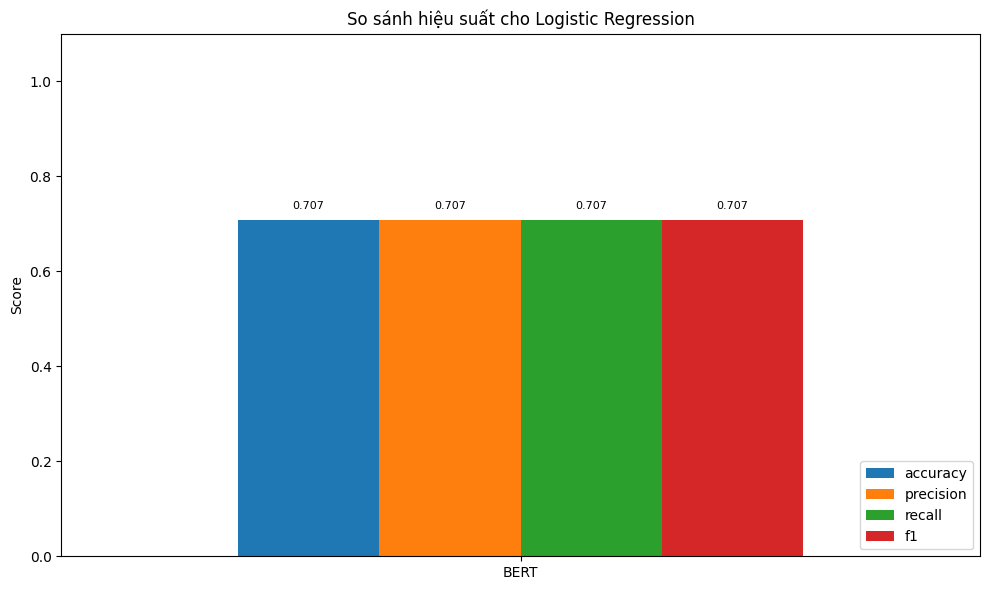

In [136]:
scores = [
    [report_bert['accuracy'], 
     report_bert['weighted avg']['precision'], 
     report_bert['weighted avg']['recall'], 
     report_bert['weighted avg']['f1-score']]
]

# Vẽ biểu đồ và lưu
visualize_compare(scores, "Logistic Regression")

Confusion matrix saved to Image\confusion_matrix_Logistic Regression_BERT.png


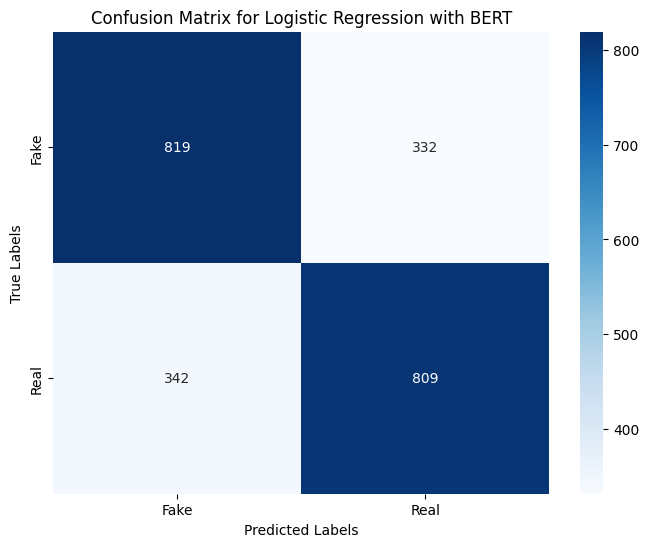

In [137]:
plot_confusion_matrix(y_test, y_pred_bert, 
                      model_name='Logistic Regression', 
                      normalization_type='BERT', 
                      labels=['Fake', 'Real'])

## Decision Tree

In [138]:
dt_model = joblib.load("D:/khai_thac_du_lieu/Final_lesson_2/best_model/best_dt_bert.pkl")
dt_best_params = dt_model.get_params()

In [139]:
dt_cv_result = cross_val_bert_model(
    model_class=DecisionTreeClassifier,
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    k=5,
    model_params=dt_best_params,
    model_name="Decision Tree (Tuned)",
    verbose=True,
    return_ensemble_predictor=True
)


=== 5-FOLD CROSS VALIDATION: Decision Tree (Tuned) + BERT ===


Folds:  20%|██        | 1/5 [00:09<00:36,  9.15s/it]

  Fold 1/5 | Acc: 0.5955 | F1: 0.5953


Folds:  40%|████      | 2/5 [00:18<00:27,  9.13s/it]

  Fold 2/5 | Acc: 0.6151 | F1: 0.6151


Folds:  60%|██████    | 3/5 [00:27<00:18,  9.08s/it]

  Fold 3/5 | Acc: 0.6097 | F1: 0.6089


Folds:  80%|████████  | 4/5 [00:36<00:09,  9.24s/it]

  Fold 4/5 | Acc: 0.6056 | F1: 0.6056


Folds: 100%|██████████| 5/5 [00:46<00:00,  9.34s/it]

  Fold 5/5 | Acc: 0.5980 | F1: 0.5977

=> Decision Tree (Tuned) - Mean Accuracy: 0.6048 ± 0.0072
=> Decision Tree (Tuned) - Mean F1-score: 0.6045
Creating ensemble predictor from 5 fold models (average probability)...


In [140]:
# LẤY HÀM DỰ ĐOÁN TRUNG BÌNH
predict_test = dt_cv_result['ensemble_predict']

# DỰ ĐOÁN TRÊN TEST
y_pred_bert = predict_test(X_test_bert) 

report_bert = classification_report(y_test, y_pred_bert, output_dict=True)

In [141]:
print(classification_report(y_test, y_pred_bert))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1151
           1       0.64      0.63      0.64      1151

    accuracy                           0.64      2302
   macro avg       0.64      0.64      0.64      2302
weighted avg       0.64      0.64      0.64      2302



In [142]:
acc_tuning.append(report_bert['accuracy'])
print(acc_tuning)

[0.7072111207645526, 0.6394439617723718]


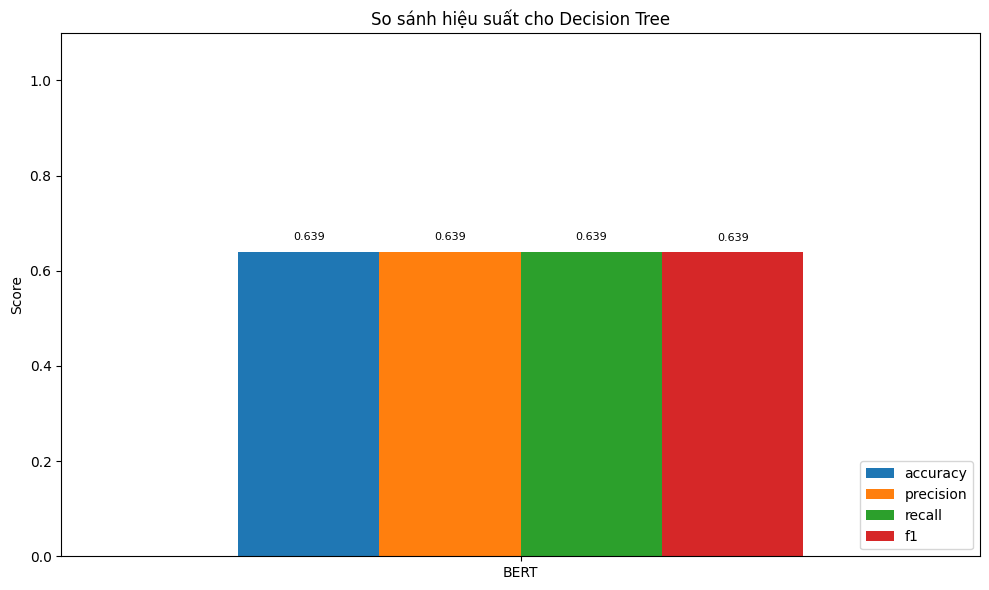

In [143]:
# Thu thập scores
scores_dt = [
    [report_bert['accuracy'],
     report_bert['weighted avg']['precision'],
     report_bert['weighted avg']['recall'],
     report_bert['weighted avg']['f1-score']]
]
# Vẽ biểu đồ so sánh
visualize_compare(scores_dt, "Decision Tree")

Confusion matrix saved to Image\confusion_matrix_Decision Tree_BERT.png


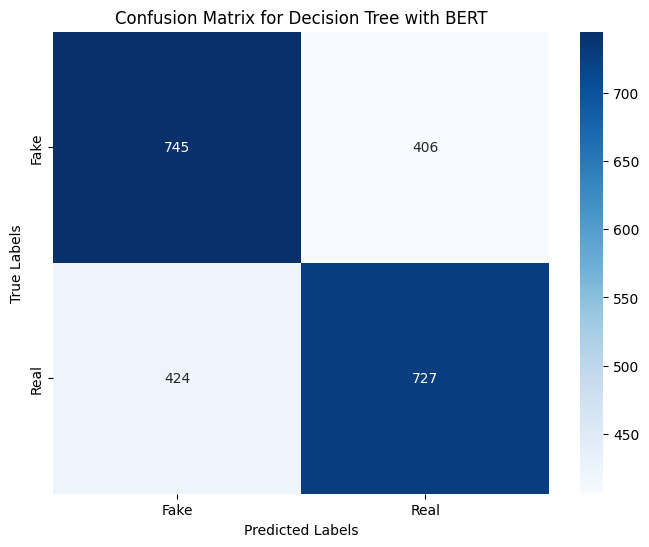

In [144]:
# Vẽ confusion matrix
plot_confusion_matrix(
    y_test, y_pred_bert,
    model_name='Decision Tree',
    normalization_type='BERT',
    labels=['Fake', 'Real']
)

## Random Forest

In [145]:
rf_model = joblib.load("D:/khai_thac_du_lieu/Final_lesson_2/best_model/best_rf_bert.pkl")
rf_best_params = rf_model.get_params()

In [146]:
rf_cv_result = cross_val_bert_model(
    model_class=RandomForestClassifier,
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    k=5,
    model_params=rf_best_params,
    model_name="Random Forest (Tuned)",
    verbose=True,
    return_ensemble_predictor=True
)


=== 5-FOLD CROSS VALIDATION: Random Forest (Tuned) + BERT ===


Folds:   0%|          | 0/5 [00:00<?, ?it/s]

Folds:  20%|██        | 1/5 [52:02<3:28:11, 3122.80s/it]

  Fold 1/5 | Acc: 0.6900 | F1: 0.6883


Folds:  40%|████      | 2/5 [1:58:20<3:01:17, 3625.93s/it]

  Fold 2/5 | Acc: 0.7030 | F1: 0.7027


Folds:  60%|██████    | 3/5 [2:59:51<2:01:50, 3655.39s/it]

  Fold 3/5 | Acc: 0.6781 | F1: 0.6778


Folds:  80%|████████  | 4/5 [3:47:07<55:32, 3332.03s/it]  

  Fold 4/5 | Acc: 0.7045 | F1: 0.7039


Folds: 100%|██████████| 5/5 [4:33:49<00:00, 3285.87s/it]

  Fold 5/5 | Acc: 0.7121 | F1: 0.7114

=> Random Forest (Tuned) - Mean Accuracy: 0.6975 ± 0.0121
=> Random Forest (Tuned) - Mean F1-score: 0.6968
Creating ensemble predictor from 5 fold models (average probability)...


In [147]:
# LẤY HÀM DỰ ĐOÁN TRUNG BÌNH
predict_test = rf_cv_result['ensemble_predict']

# DỰ ĐOÁN TRÊN TEST
y_pred_bert = predict_test(X_test_bert) 

report_bert = classification_report(y_test, y_pred_bert, output_dict=True)

In [148]:
print(classification_report(y_test, y_pred_bert))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68      1151
           1       0.68      0.75      0.71      1151

    accuracy                           0.70      2302
   macro avg       0.70      0.70      0.70      2302
weighted avg       0.70      0.70      0.70      2302



In [149]:
acc_tuning.append(report_bert['accuracy'])
print(acc_tuning)

[0.7072111207645526, 0.6394439617723718, 0.6967854039965248]


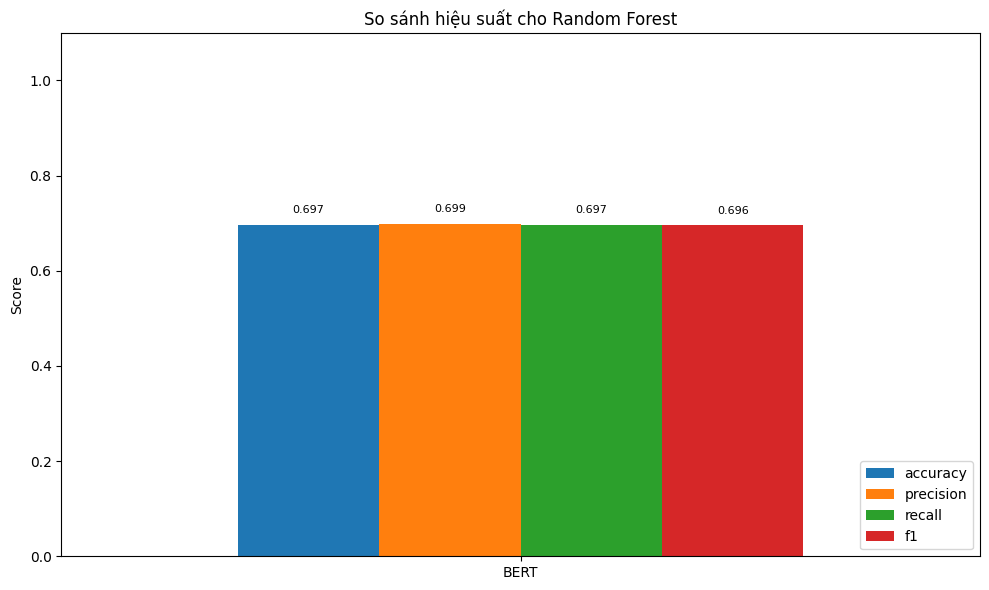

In [150]:
# Thu thập scores
scores_rf = [
    [report_bert['accuracy'],
     report_bert['weighted avg']['precision'],
     report_bert['weighted avg']['recall'],
     report_bert['weighted avg']['f1-score']]
]
# Vẽ biểu đồ so sánh
visualize_compare(scores_rf, "Random Forest")

Confusion matrix saved to Image\confusion_matrix_Random Forest_BERT.png


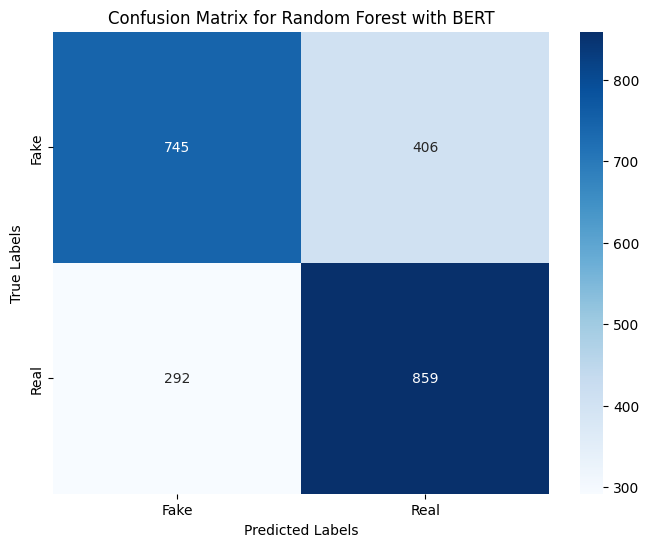

In [151]:
# Vẽ confusion matrix
plot_confusion_matrix(
    y_test, y_pred_bert,
    model_name='Random Forest',
    normalization_type='BERT',
    labels=['Fake', 'Real']
)

## XGBoost

In [152]:
xgb_model = joblib.load("D:/khai_thac_du_lieu/Final_lesson_2/best_model/best_xgb_bert.pkl")
xgb_best_params = xgb_model.get_params()

In [153]:
xgb_cv_result = cross_val_bert_model(
    model_class=XGBClassifier,
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    k=5,
    model_params=xgb_best_params,
    model_name="XGBoost (Tuned)",
    verbose=True,
    return_ensemble_predictor=True
)


=== 5-FOLD CROSS VALIDATION: XGBoost (Tuned) + BERT ===


Folds:  20%|██        | 1/5 [01:37<06:29, 97.30s/it]

  Fold 1/5 | Acc: 0.7058 | F1: 0.7051


Folds:  40%|████      | 2/5 [03:14<04:51, 97.09s/it]

  Fold 2/5 | Acc: 0.7269 | F1: 0.7269


Folds:  60%|██████    | 3/5 [04:50<03:13, 96.71s/it]

  Fold 3/5 | Acc: 0.7123 | F1: 0.7123


Folds:  80%|████████  | 4/5 [06:27<01:36, 96.81s/it]

  Fold 4/5 | Acc: 0.7203 | F1: 0.7202


Folds: 100%|██████████| 5/5 [08:04<00:00, 96.82s/it]

  Fold 5/5 | Acc: 0.7279 | F1: 0.7278

=> XGBoost (Tuned) - Mean Accuracy: 0.7186 ± 0.0085
=> XGBoost (Tuned) - Mean F1-score: 0.7185
Creating ensemble predictor from 5 fold models (average probability)...


In [154]:
# LẤY HÀM DỰ ĐOÁN TRUNG BÌNH
predict_test = xgb_cv_result['ensemble_predict']

# DỰ ĐOÁN TRÊN TEST
y_pred_bert = predict_test(X_test_bert) 

report_bert = classification_report(y_test, y_pred_bert, output_dict=True)

In [155]:
print(classification_report(y_test, y_pred_bert))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1151
           1       0.71      0.74      0.72      1151

    accuracy                           0.72      2302
   macro avg       0.72      0.72      0.72      2302
weighted avg       0.72      0.72      0.72      2302



In [156]:
acc_tuning.append(report_bert['accuracy'])
print(acc_tuning)

[0.7072111207645526, 0.6394439617723718, 0.6967854039965248, 0.7176368375325803]


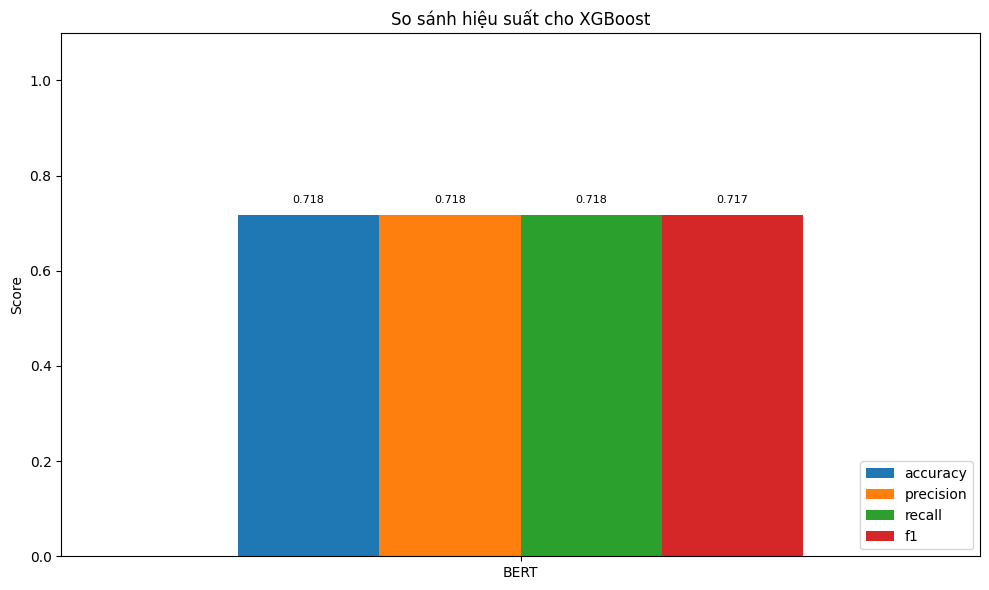

In [157]:
# Thu thập scores
scores_xgb = [
    [report_bert['accuracy'],
     report_bert['weighted avg']['precision'],
     report_bert['weighted avg']['recall'],
     report_bert['weighted avg']['f1-score']]
]
# Vẽ biểu đồ so sánh
visualize_compare(scores_xgb, "XGBoost")

Confusion matrix saved to Image\confusion_matrix_XGBoost_BERT.png


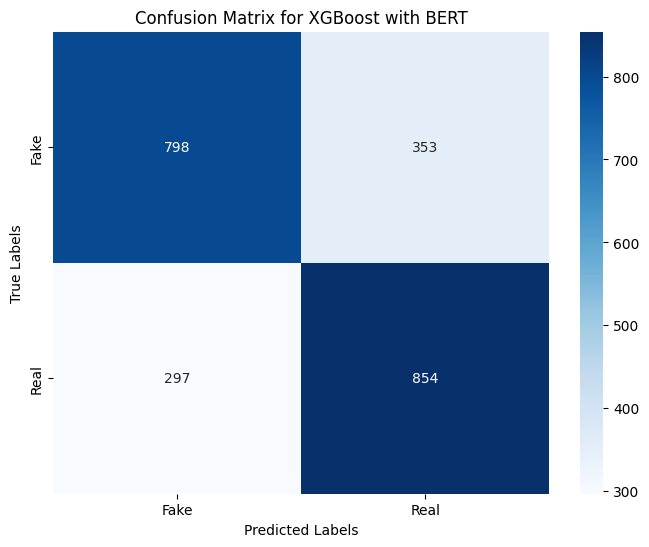

In [158]:
# Vẽ confusion matrix
plot_confusion_matrix(
    y_test, y_pred_bert,
    model_name='XGBoost',
    normalization_type='BERT',
    labels=['Fake', 'Real']
)

## LSTM

In [159]:
checkpoint = torch.load("D:/khai_thac_du_lieu/Final_lesson_2/best_model/best_lstm_bert.pth", map_location='cpu')
lstm_best_params = checkpoint['best_params']       

In [160]:
lstm_cv_result = train_bert_lstm_simple(
    X_train_bert=X_train_bert,
    y_train_resampled=y_train_resampled,
    X_test_bert=X_test_bert,
    y_test=y_test,
    validation_split=0.2,
    epochs=lstm_best_params['epochs'],
    batch_size=lstm_best_params['batch_size'],
    lr=lstm_best_params['lr'],
    random_state=42
)


Training LSTM + BERT with Train/Validation Split
Epoch 1/15, Loss: 0.6174, Val Accuracy: 0.6819
Epoch 2/15, Loss: 0.5705, Val Accuracy: 0.6900
Epoch 3/15, Loss: 0.5485, Val Accuracy: 0.7367
Epoch 4/15, Loss: 0.5275, Val Accuracy: 0.7470
Epoch 5/15, Loss: 0.5112, Val Accuracy: 0.7742
Epoch 6/15, Loss: 0.4859, Val Accuracy: 0.7856
Epoch 7/15, Loss: 0.4622, Val Accuracy: 0.7980
Epoch 8/15, Loss: 0.4364, Val Accuracy: 0.8263
Epoch 9/15, Loss: 0.4094, Val Accuracy: 0.8046
Epoch 10/15, Loss: 0.3776, Val Accuracy: 0.8719
Epoch 11/15, Loss: 0.3517, Val Accuracy: 0.8708
Epoch 12/15, Loss: 0.3204, Val Accuracy: 0.9083
Epoch 13/15, Loss: 0.2953, Val Accuracy: 0.9240
Epoch 14/15, Loss: 0.2578, Val Accuracy: 0.9397
Epoch 15/15, Loss: 0.2354, Val Accuracy: 0.9463

Evaluating on test set...
Test Accuracy: 0.7194
Test Precision: 0.7219
Test Recall: 0.7194
Test F1-Score: 0.7186


In [161]:
acc_tuning.append(lstm_cv_result['accuracy'])
print(acc_tuning)

[0.7072111207645526, 0.6394439617723718, 0.6967854039965248, 0.7176368375325803, 0.7193744569939183]


In [162]:
# LẤY 4 SỐ TỪ DICT
scores_tuning = {
    'accuracy': [lstm_cv_result['accuracy']],
    'precision': [lstm_cv_result['precision']],
    'recall': [lstm_cv_result['recall']],
    'f1': [lstm_cv_result['f1']]
}
scores_tunning = pd.DataFrame(scores_tuning, index=['BERT'])

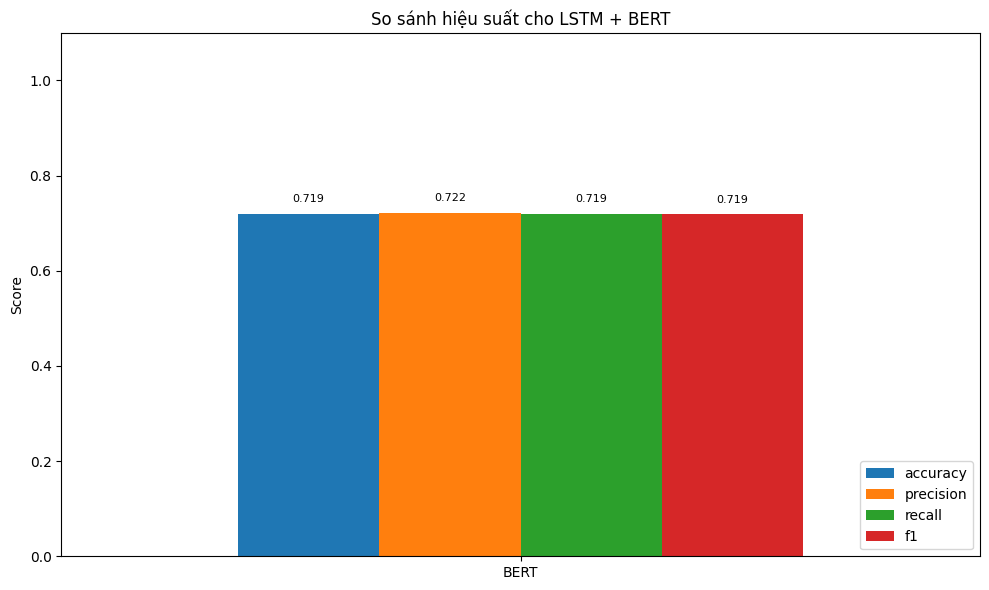

In [163]:
# Vẽ biểu đồ và lưu
visualize_compare(scores_tunning, "LSTM + BERT")

Confusion matrix saved to D:/khai_thac_du_lieu/Final_lesson_2/Image\confusion_matrix_LSTM_BERT_No_Normalization.png


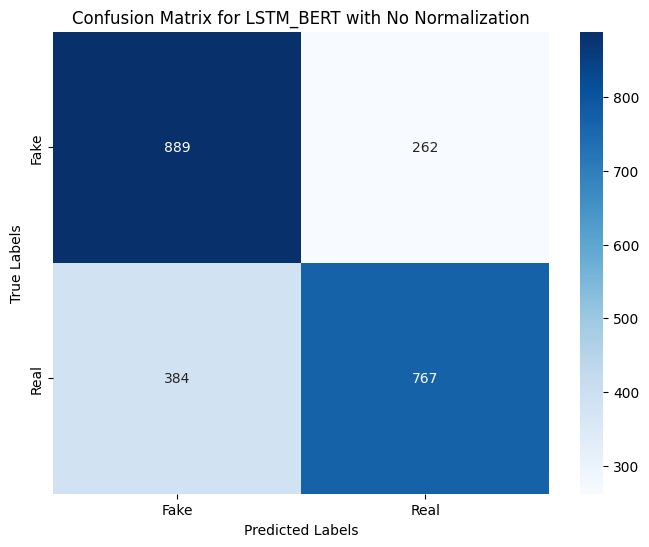

In [164]:
y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test
plot_confusion_matrix(
    y_true=y_test_np,
    y_pred=lstm_cv_result['y_pred'],
    model_name='LSTM_BERT',
    normalization_type='No Normalization',
    labels=['Fake', 'Real'],
    save_dir=png_dir
)

## So sánh mô hình

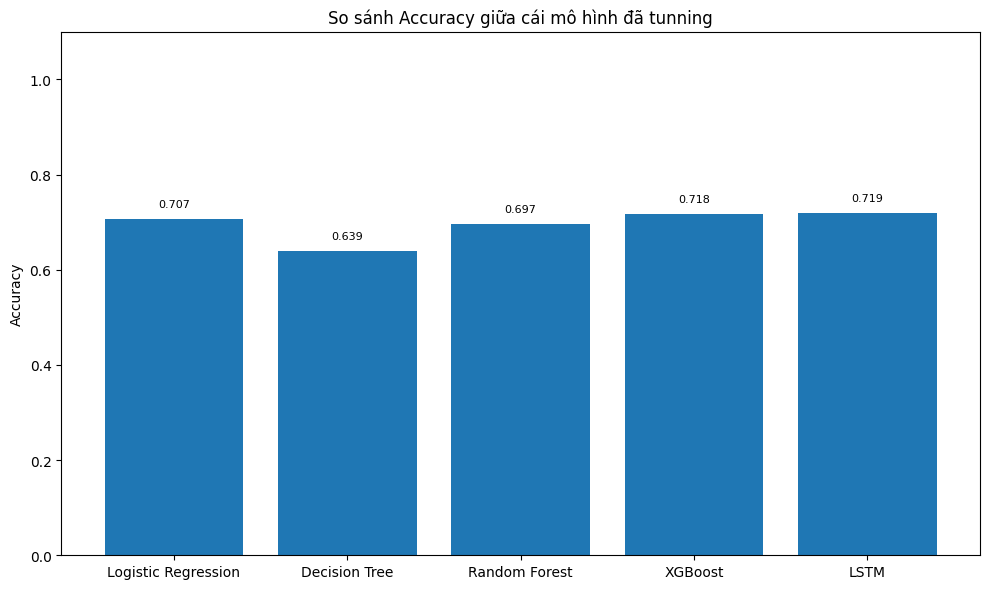

In [165]:
visualize_compare_acc(acc_tuning, 'So sánh Accuracy giữa cái mô hình đã tunning', 'BERT-tuning')